# Lab 3 : Row and Column Space, Matrix Multiplication, Linear Maps

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from face_data import Face1, edges

# Task 1 - Practice vectorized coding

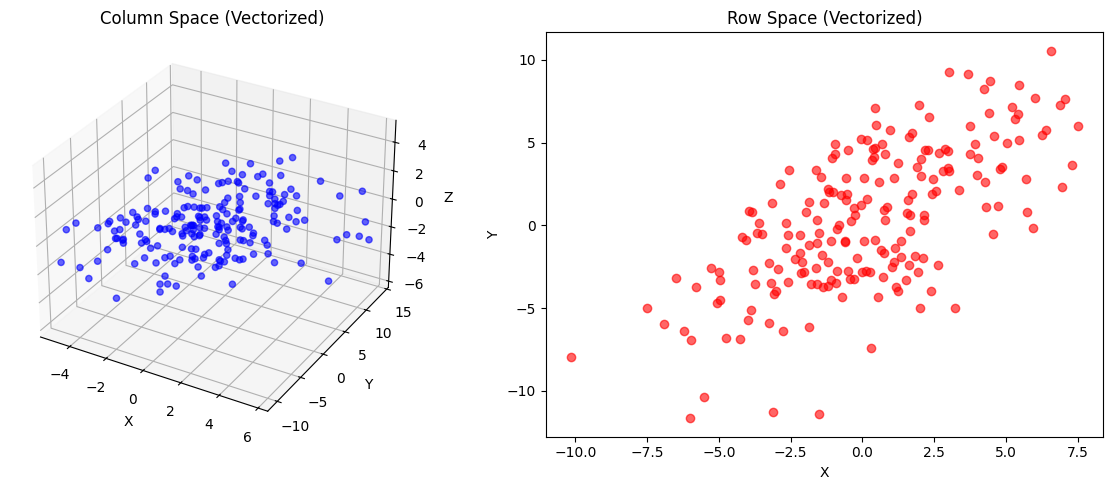

Matrix A shape: (3, 2)
Rank of A: 2
Column space dimension: 2
Row space dimension: 2


In [2]:
def plot_face(plt, X, edges, color='b'):
    """Plot a face with all edges"""
    plt.plot(X[:, 0], X[:, 1], 'o', color=color, markersize=3)
    
    for i, j in edges:
        xi, yi = X[i]
        xj, yj = X[j]
        plt.plot((xi, xj), (yi, yj), '-', color=color, linewidth=1)
    
    plt.axis('square')
    plt.xlim(-100, 100)
    plt.ylim(-100, 100)


A = np.array([[1, 2],
              [3, 4],
              [-2, 1]])

fig = plt.figure(figsize=(12, 5))

# Column space (vectorized)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title('Column Space (Vectorized)')

# Create random coefficients for all points at once
n_points = 200
U = np.random.randn(2, n_points)  # 2 x 200
V = A @ U  # 3 x 200

ax1.scatter(V[0, :], V[1, :], V[2, :], color='b', alpha=0.6)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Row space (vectorized)
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Row Space (Vectorized)')

U_rows = np.random.randn(n_points, 3)  # 200 x 3
V_rows = U_rows @ A  # 200 x 2

ax2.plot(V_rows[:, 0], V_rows[:, 1], 'ro', alpha=0.6)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

plt.tight_layout()
plt.show()

# Analysis
print(f"Matrix A shape: {A.shape}")
print(f"Rank of A: {np.linalg.matrix_rank(A)}")
print(f"Column space dimension: {np.linalg.matrix_rank(A)}")
print(f"Row space dimension: {np.linalg.matrix_rank(A)}")


## Outputs:

- Vector display of **column space (3D)** and **row space (2D)** for matrix A
- **200 points** generated simultaneously without using loops

## Answers to Questions:

### Do all points lie in a lower-dimensional subspace?
- **Yes**, by rotating the 3D plot, it can be observed that all points lie on a single plane

### What are the dimensions of column and row spaces?

```python
Matrix A shape: (3, 2)
Rank of A: 2
Column space dimension: 2
Row space dimension: 2
```
- Both row space and column space have dimension 2

---
# Task 2: Specific matrix analysis

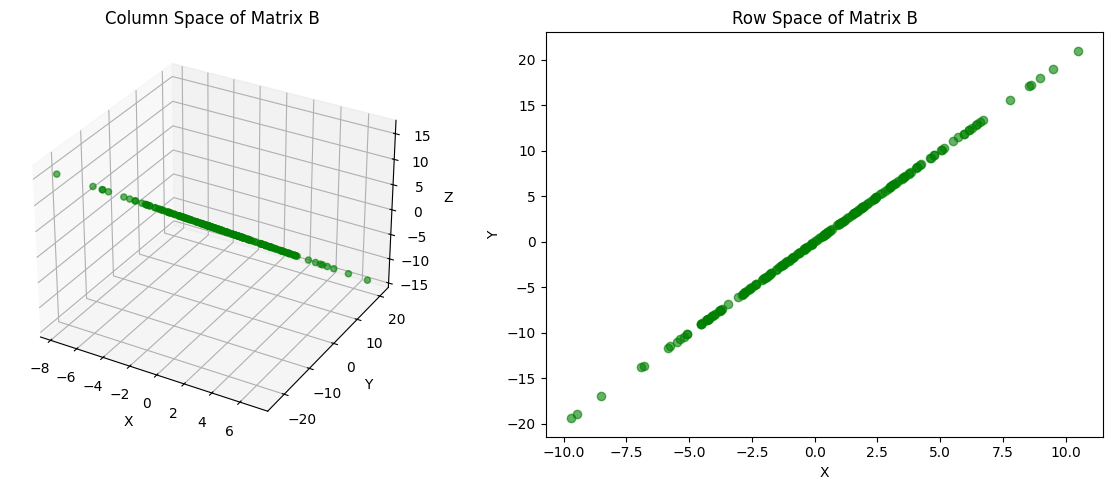

Matrix B shape: (3, 2)
Rank of B: 1
Column space dimension of B: 1
Row space dimension of B: 1


In [3]:
B = np.array([[1, 2],
              [3, 6],
              [-2, -4]])

fig = plt.figure(figsize=(12, 5))

# Column space for matrix B
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title('Column Space of Matrix B')

U_b = np.random.randn(2, 200)
V_b = B @ U_b

ax1.scatter(V_b[0, :], V_b[1, :], V_b[2, :], color='g', alpha=0.6)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Row space for matrix B
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Row Space of Matrix B')

U_rows_b = np.random.randn(200, 3)
V_rows_b = U_rows_b @ B

ax2.plot(V_rows_b[:, 0], V_rows_b[:, 1], 'go', alpha=0.6)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

plt.tight_layout()
plt.show()

print(f"Matrix B shape: {B.shape}")
print(f"Rank of B: {np.linalg.matrix_rank(B)}")
print(f"Column space dimension of B: {np.linalg.matrix_rank(B)}")
print(f"Row space dimension of B: {np.linalg.matrix_rank(B)}")


## Outputs:

- Matrix B has **linear dependency** between its columns
- The column space has **dimension 1**

## Answer:

```python
Matrix B shape: (3, 2)
Rank of B: 1
Column space dimension of B: 1
Row space dimension of B: 1
```
- Reason: The second column is exactly twice the first column ([2, 6, -4] = 2 × [1, 3, -2])



---
# Task 3: Comparison of three matrices

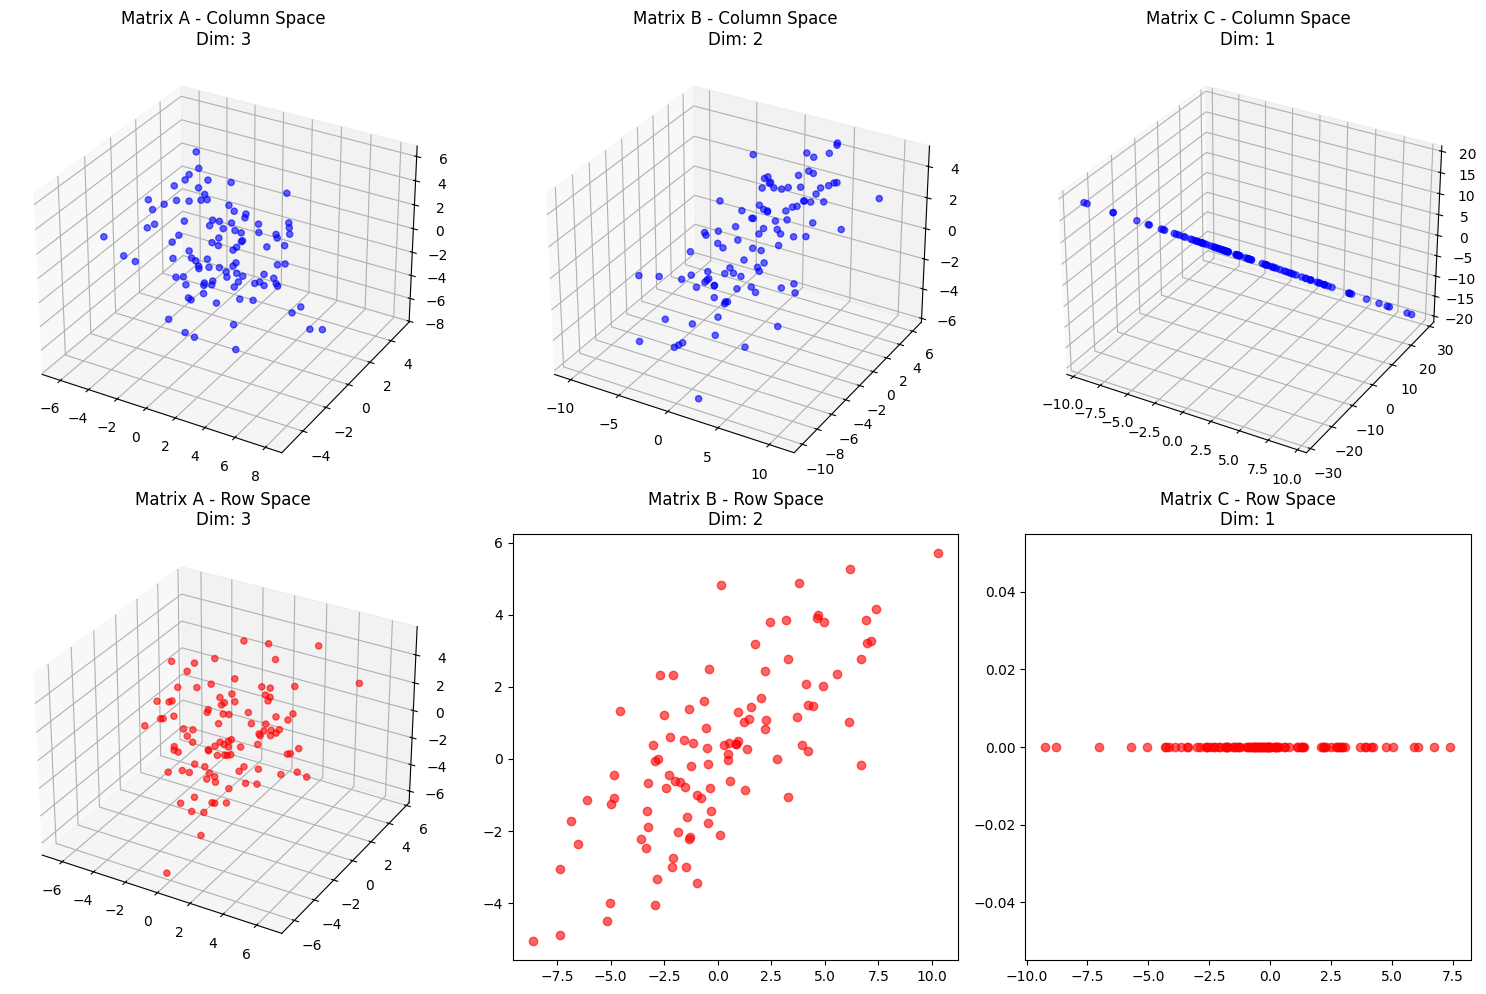


Comparing row and column spaces:
Matrix B:
  - Rank: 2
  - Column space dimension: 2
  - Row space dimension: 2
  - Are row and column spaces equal? True
Matrix C:
  - Rank: 1
  - Column space dimension: 1
  - Row space dimension: 1
  - Are row and column spaces equal? True


In [4]:
# Define matrices
A_mat = np.array([[1, 2, 1],
                  [2, -1, -1],
                  [-1, 1, -2]])

B_mat = np.array([[1, 2, -3],
                  [3, 1, 1],
                  [2, 1, 0]])

C_mat = np.array([[1, 2, -3],
                  [3, 6, -9],
                  [-2, -4, 6]])

matrices = [A_mat, B_mat, C_mat]
names = ['A', 'B', 'C']

fig = plt.figure(figsize=(15, 10))

for idx, (matrix, name) in enumerate(zip(matrices, names)):
    n_points = 100
    
    # Column space (3D)
    ax_col = fig.add_subplot(2, 3, idx + 1, projection='3d')
    U_col = np.random.randn(matrix.shape[1], n_points)
    V_col = matrix @ U_col
    ax_col.scatter(V_col[0, :], V_col[1, :], V_col[2, :], color='blue', alpha=0.6)
    ax_col.set_title(f'Matrix {name} - Column Space\nDim: {np.linalg.matrix_rank(matrix)}')
    
    # Row space (2D/3D depending on rank)
    ax_row = fig.add_subplot(2, 3, idx + 4)
    U_row = np.random.randn(n_points, matrix.shape[0])
    V_row = U_row @ matrix
    
    if np.linalg.matrix_rank(matrix) == 1:
        ax_row.plot(V_row[:, 0], np.zeros_like(V_row[:, 0]), 'ro', alpha=0.6)
    elif np.linalg.matrix_rank(matrix) == 2:
        ax_row.plot(V_row[:, 0], V_row[:, 1], 'ro', alpha=0.6)
    else:
        from mpl_toolkits.mplot3d import Axes3D
        ax_row.remove()
        ax_row = fig.add_subplot(2, 3, idx + 4, projection='3d')
        ax_row.scatter(V_row[:, 0], V_row[:, 1], V_row[:, 2], color='red', alpha=0.6)
    
    ax_row.set_title(f'Matrix {name} - Row Space\nDim: {np.linalg.matrix_rank(matrix)}')

plt.tight_layout()
plt.show()

# Compare row and column spaces for matrices B and C
print("\nComparing row and column spaces:")
for name, matrix in zip(['B', 'C'], [B_mat, C_mat]):
    rank = np.linalg.matrix_rank(matrix)
    print(f"Matrix {name}:")
    print(f"  - Rank: {rank}")
    print(f"  - Column space dimension: {rank}")
    print(f"  - Row space dimension: {rank}")
    print(f"  - Are row and column spaces equal? {np.linalg.matrix_rank(matrix) == np.linalg.matrix_rank(matrix.T)}")


## Matrix Analysis:

### Matrix A:
- **Rank = 3**
- Both row and column spaces are complete/full-dimensional

### Matrix B:
- **Rank = 3** 
- Complete row and column spaces

### Matrix C:
- **Rank = 1**
- Strong linear dependency between rows and columns

## Answers to Questions:

### Are row space and column space equal?
- **Dimensionally yes**, but geometrically they may differ
- The dimensions of row space and column space are always equal (matrix rank)

### Observations for Matrices B and C:
- For **Matrix B**: Row space and column space have different dimensions but the same rank
- For **Matrix C**: Both row space and column space have **dimension 1**

---
# Task 4: Linear Transformations

4A: Rotation animation


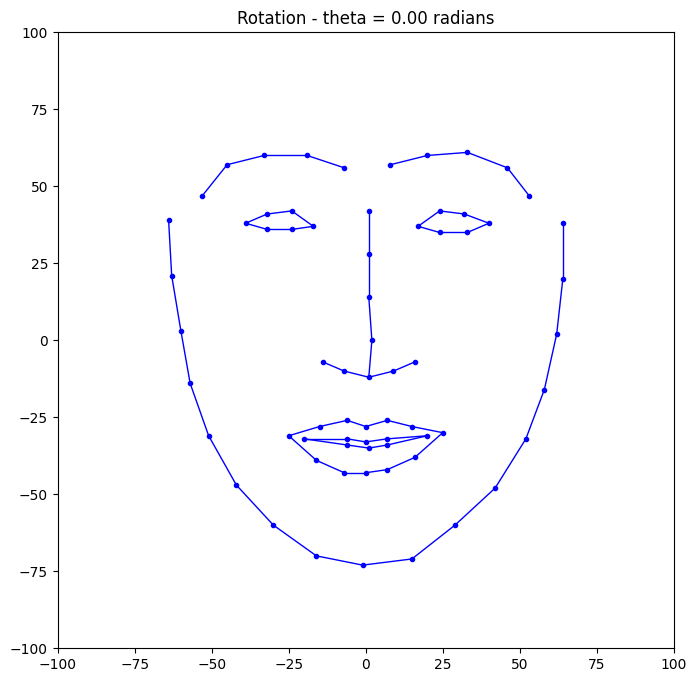

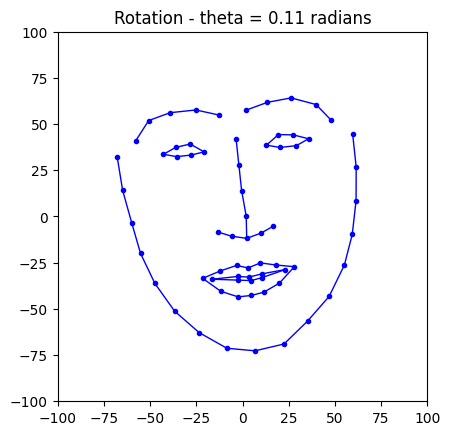

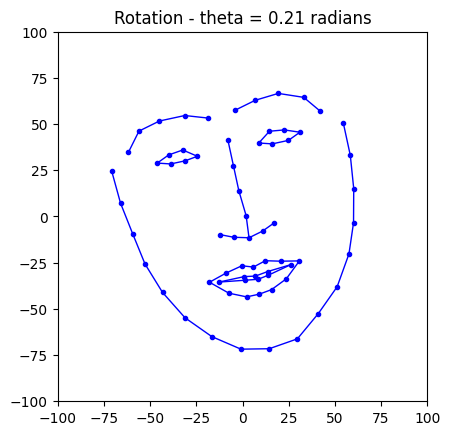

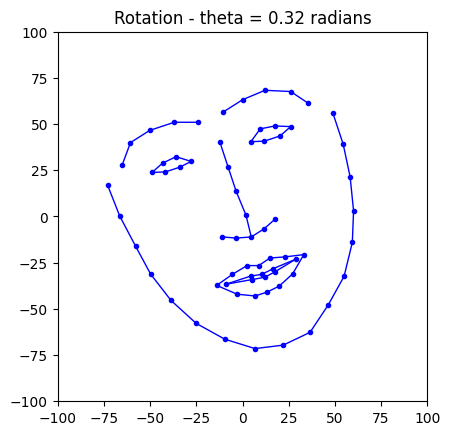

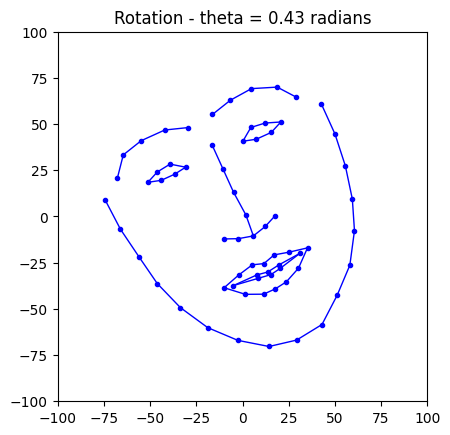

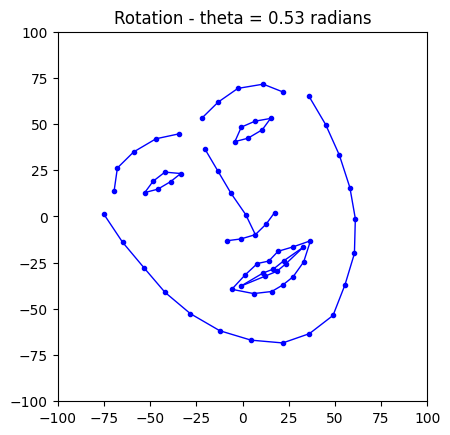

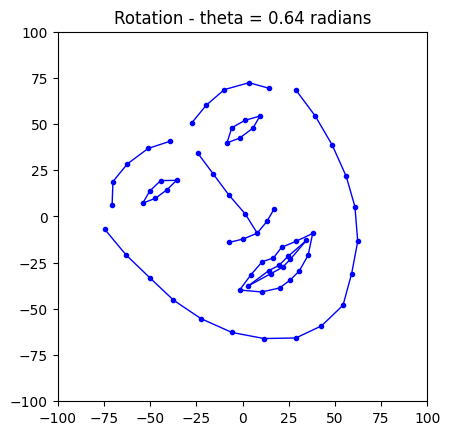

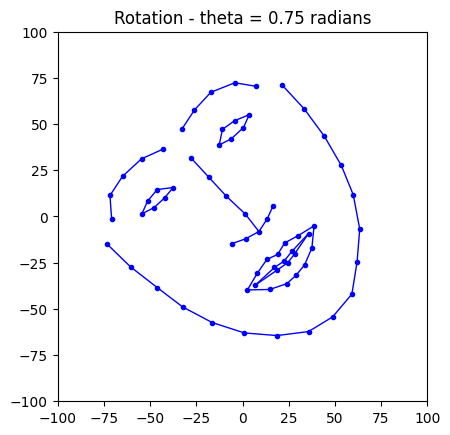

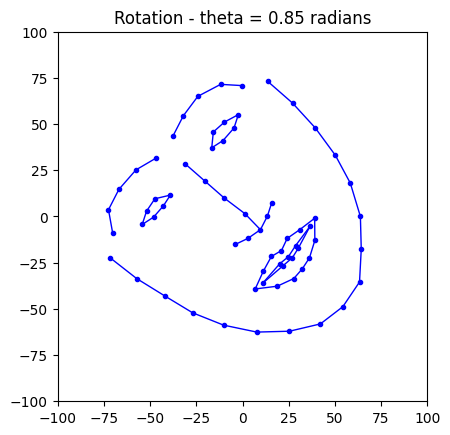

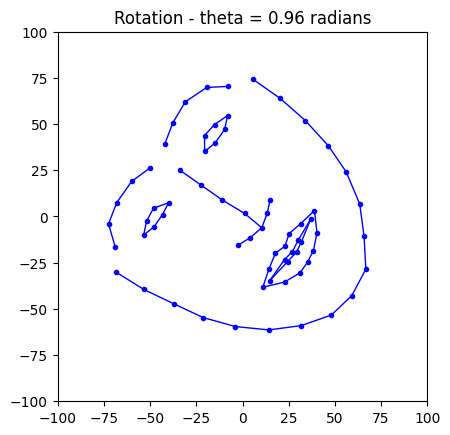

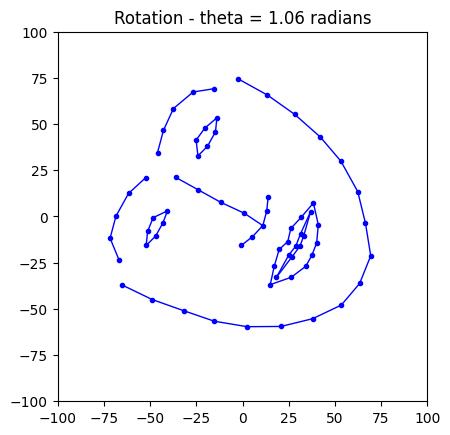

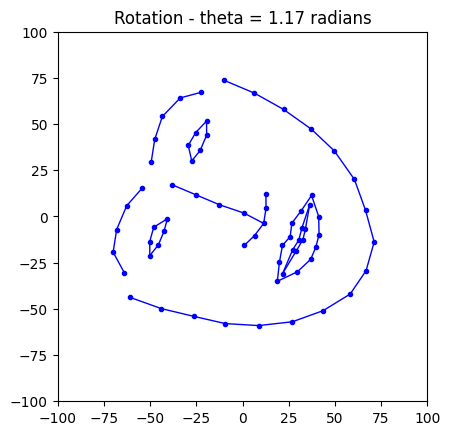

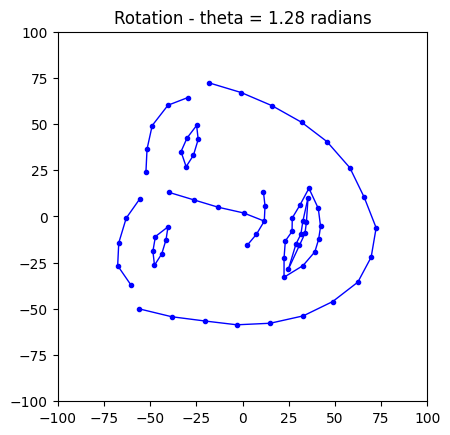

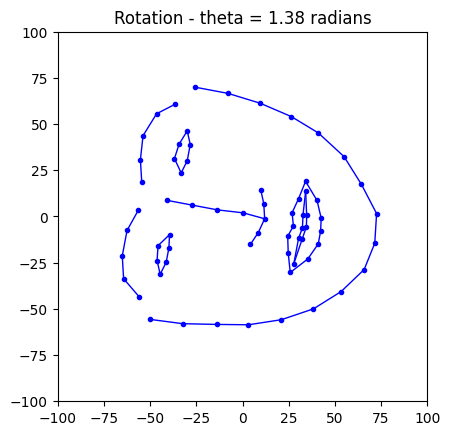

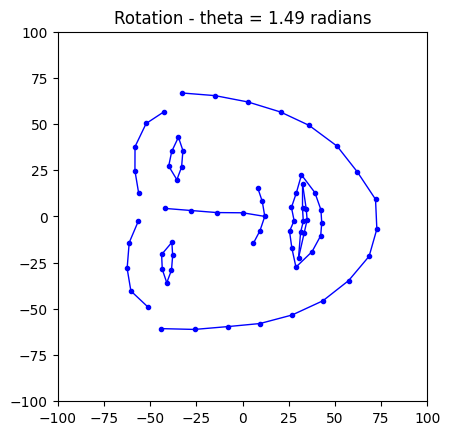

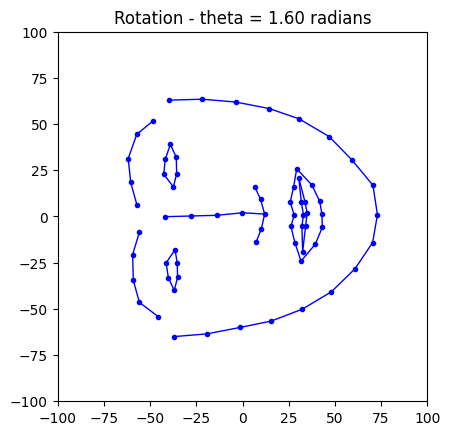

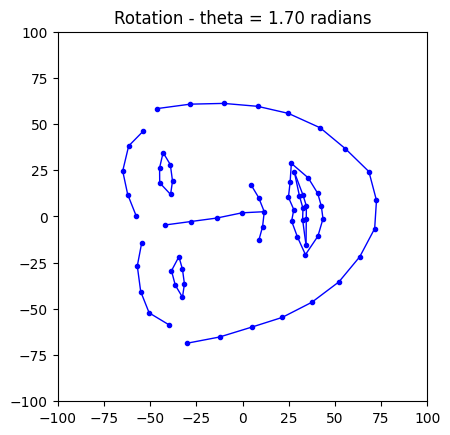

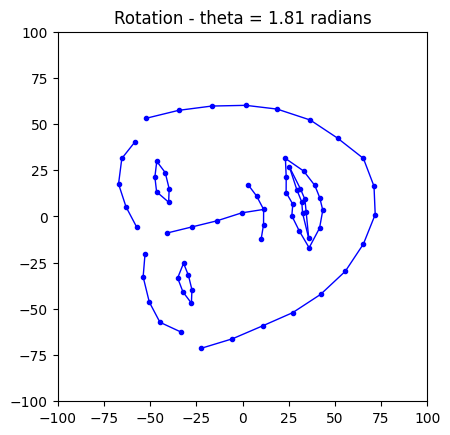

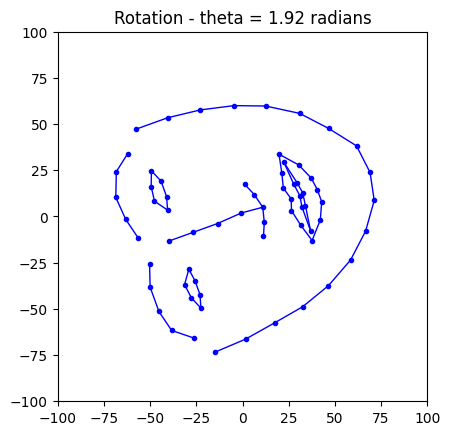

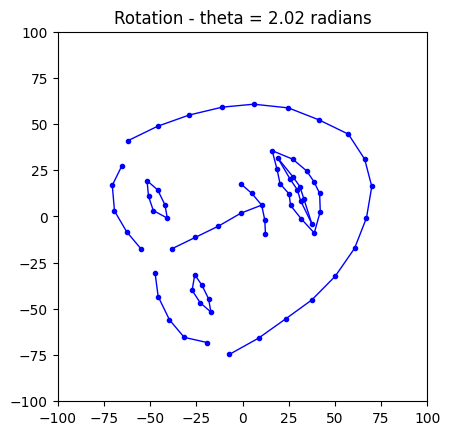

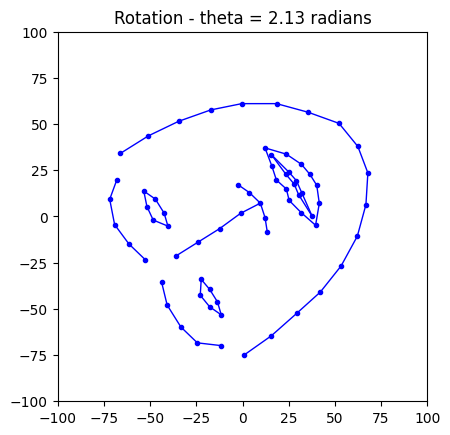

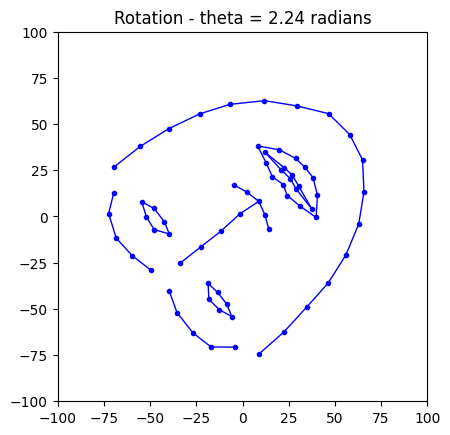

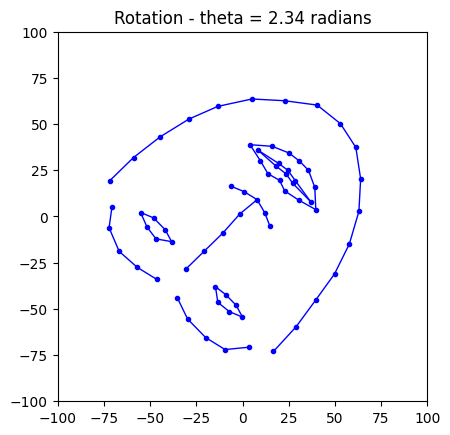

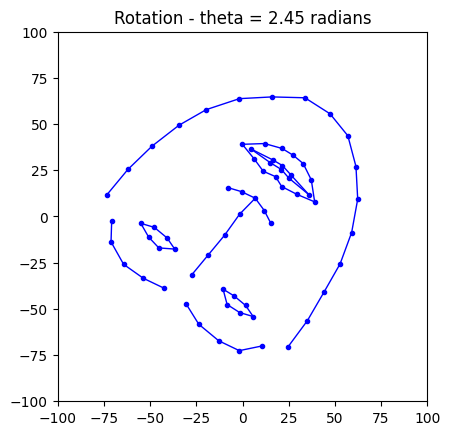

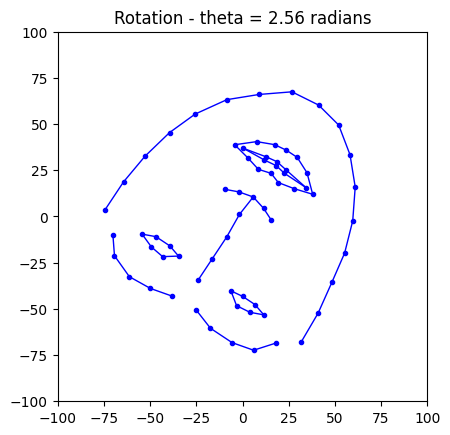

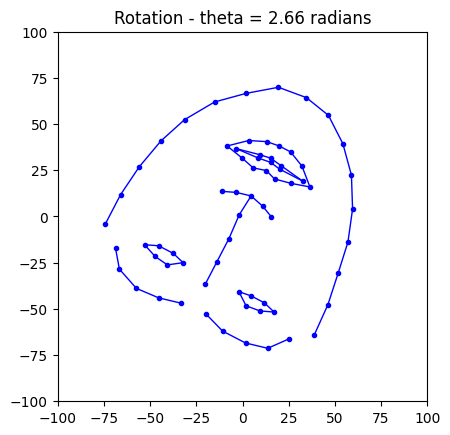

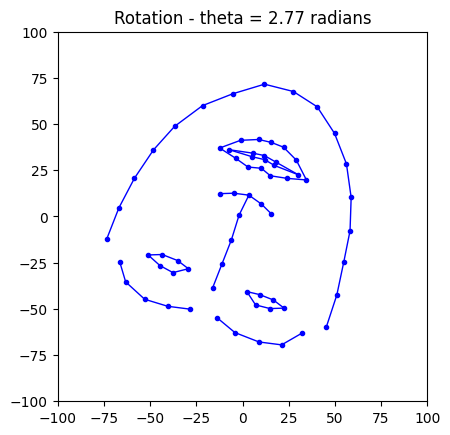

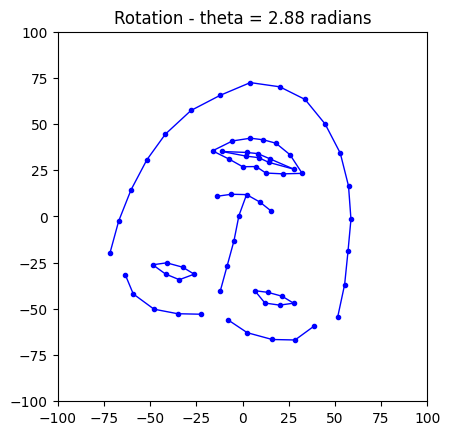

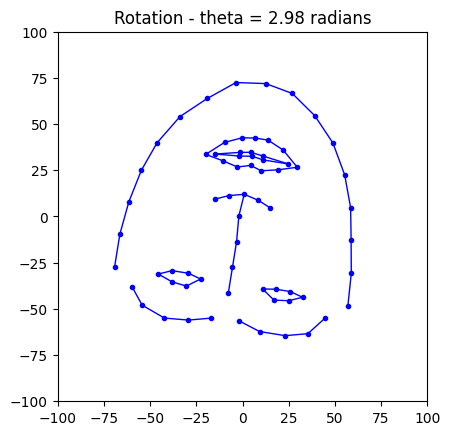

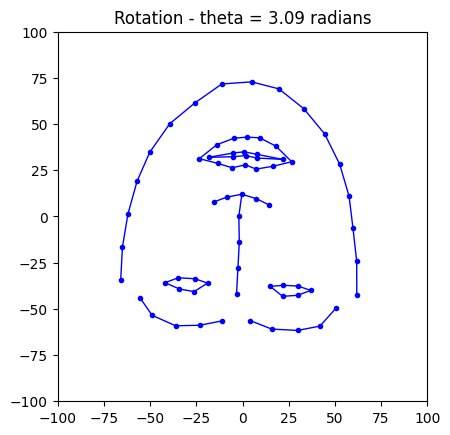

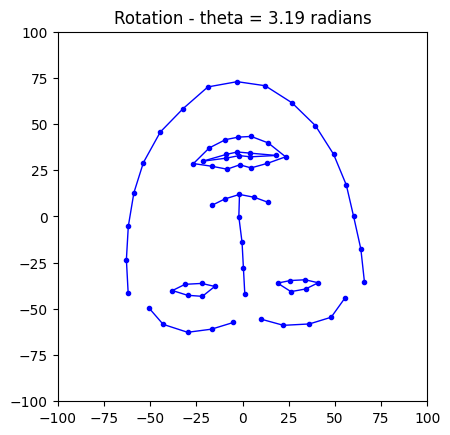

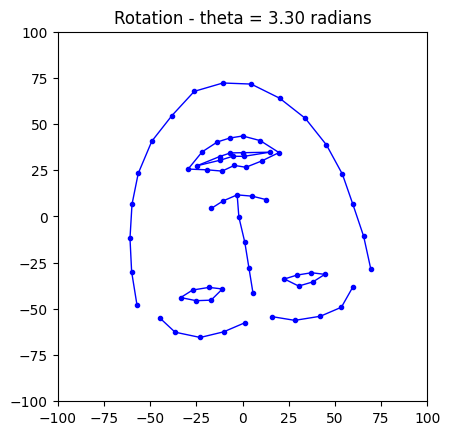

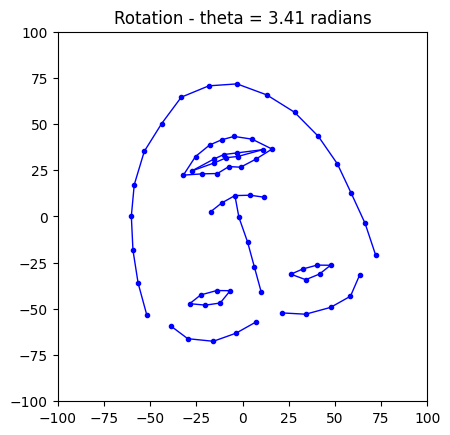

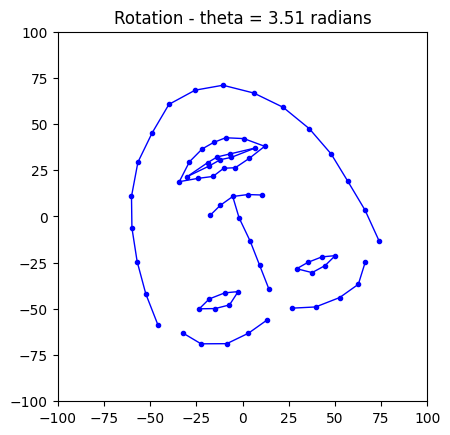

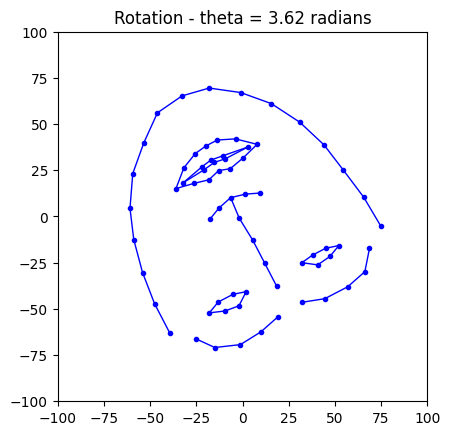

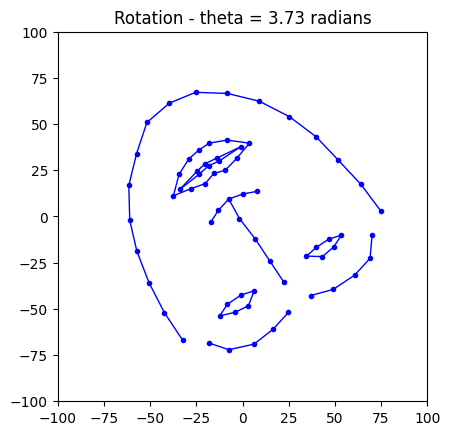

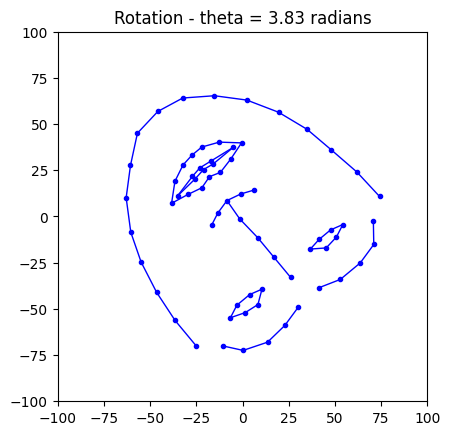

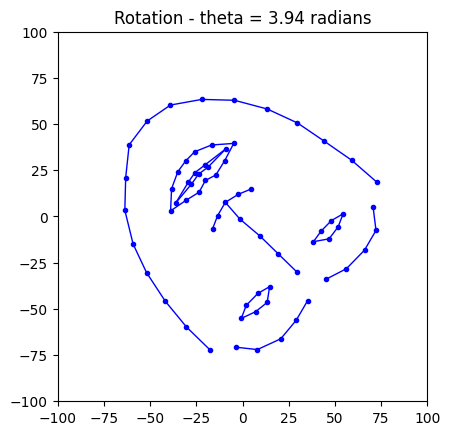

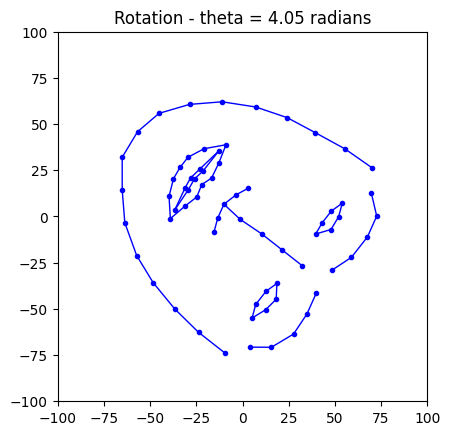

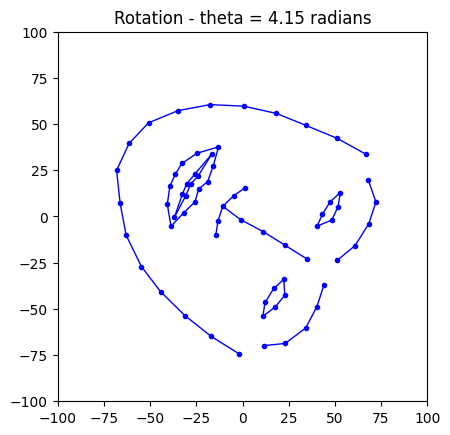

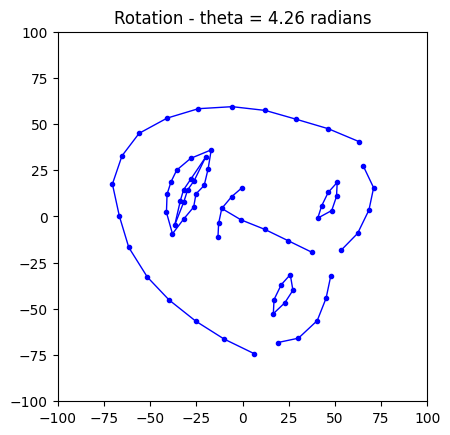

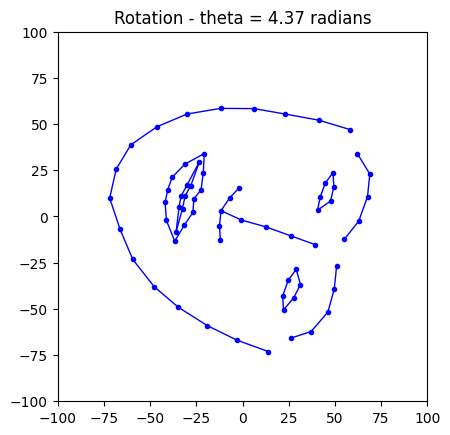

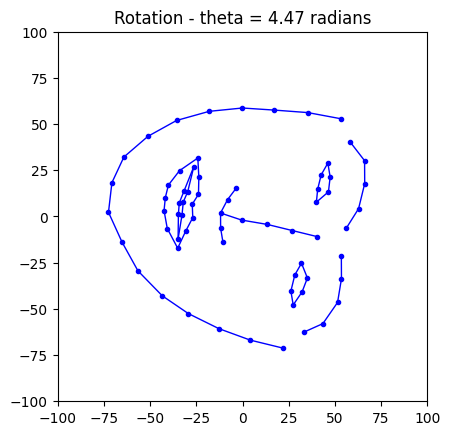

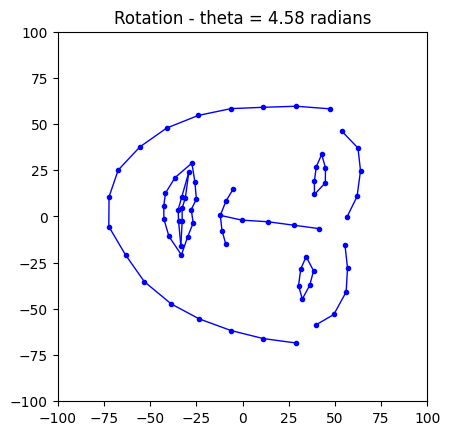

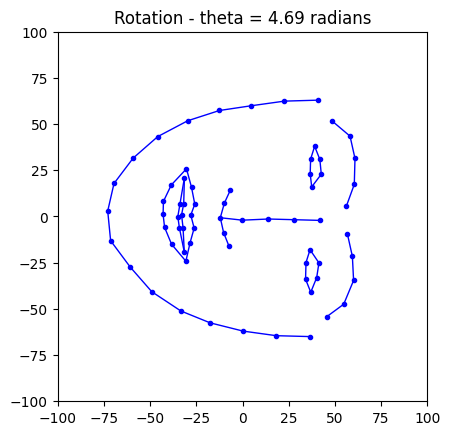

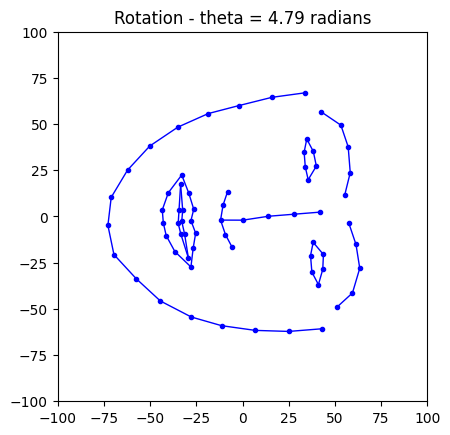

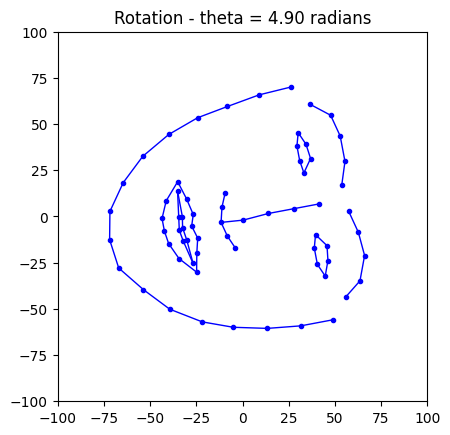

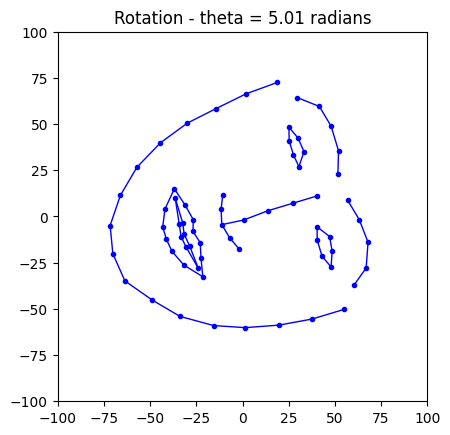

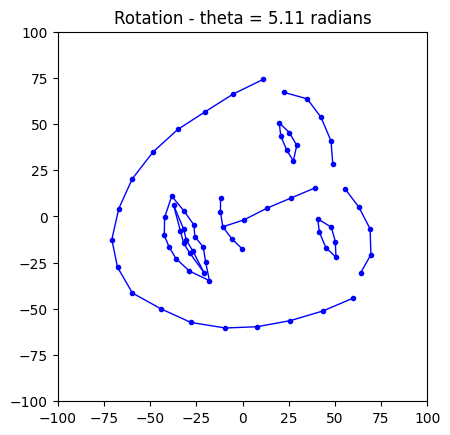

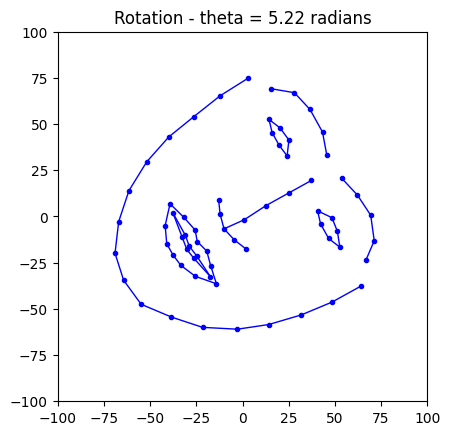

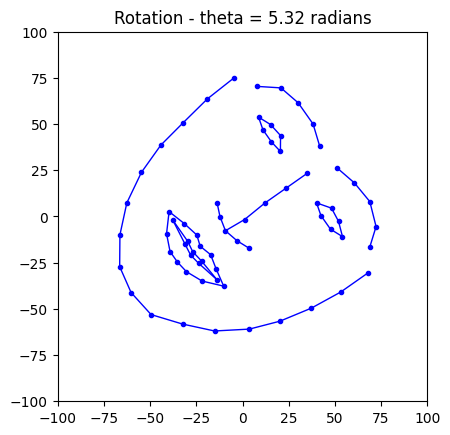

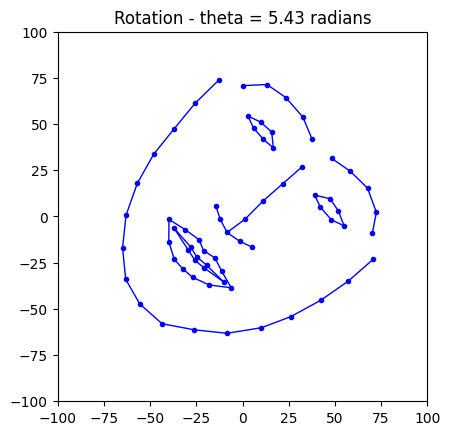

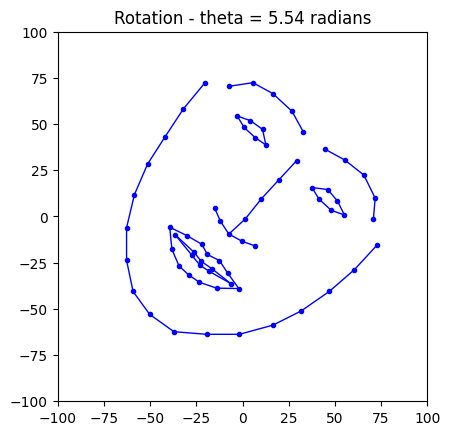

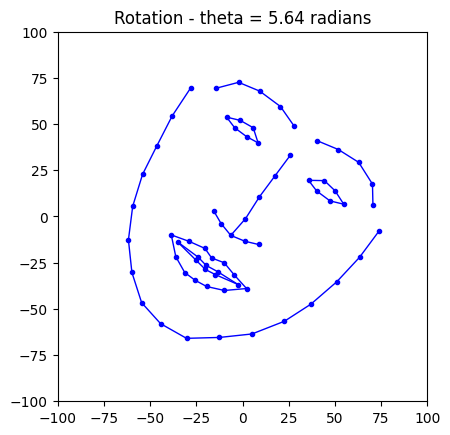

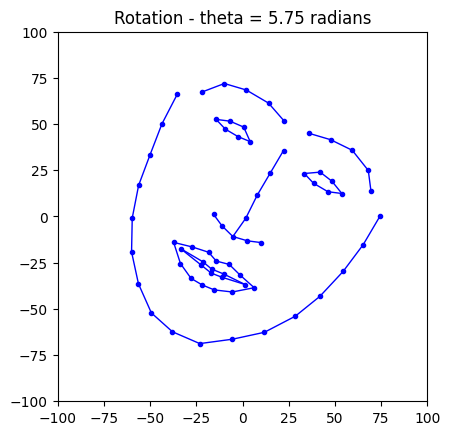

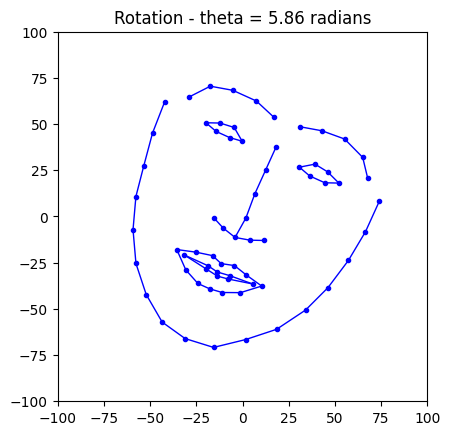

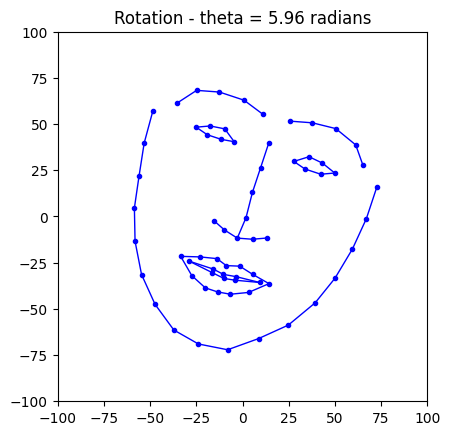

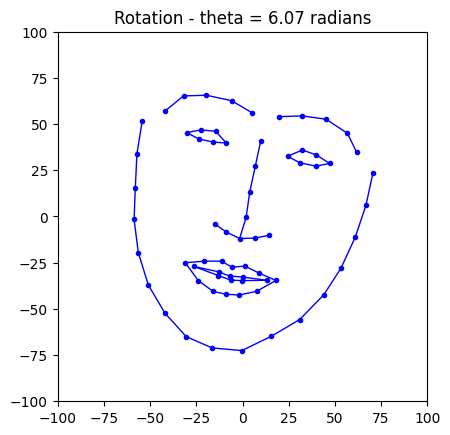

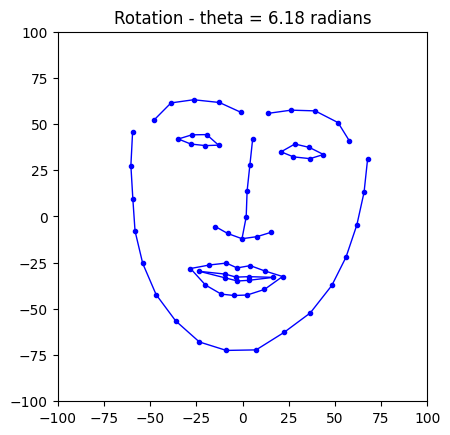

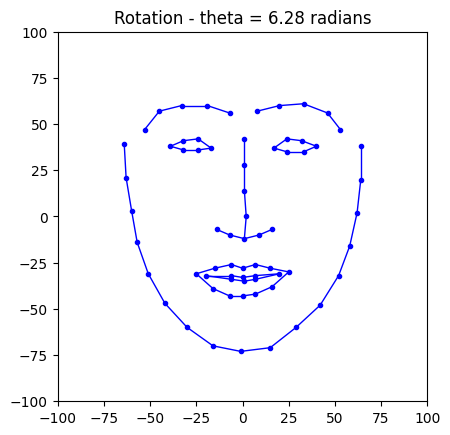

4B: Uniform scaling animation


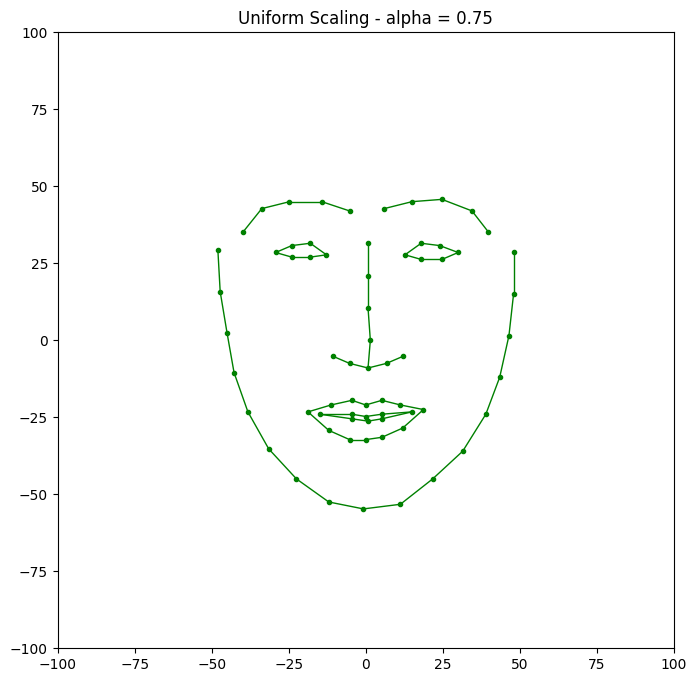

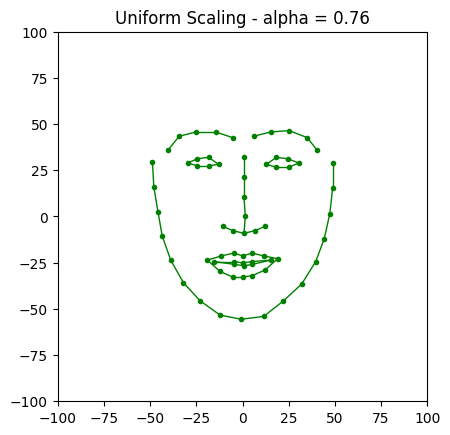

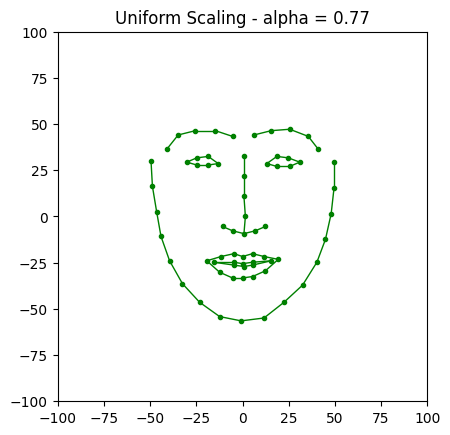

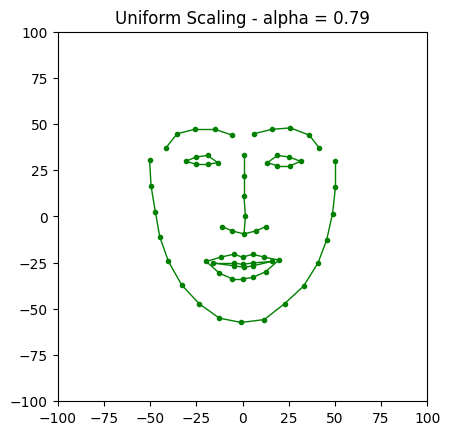

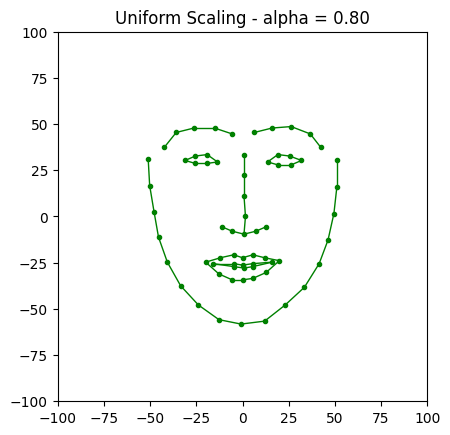

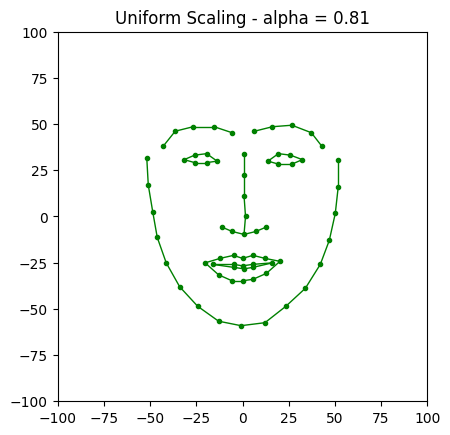

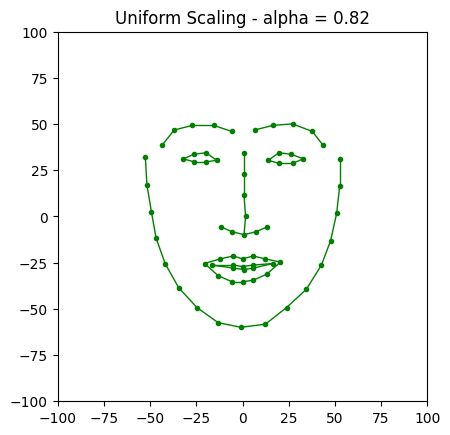

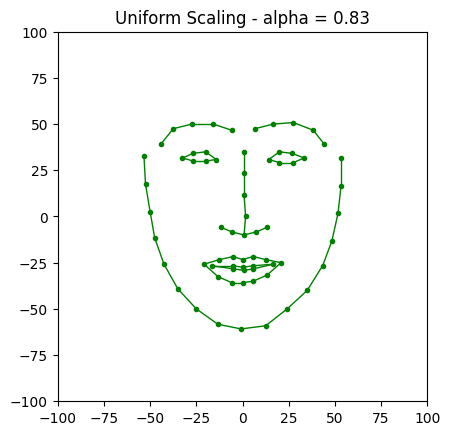

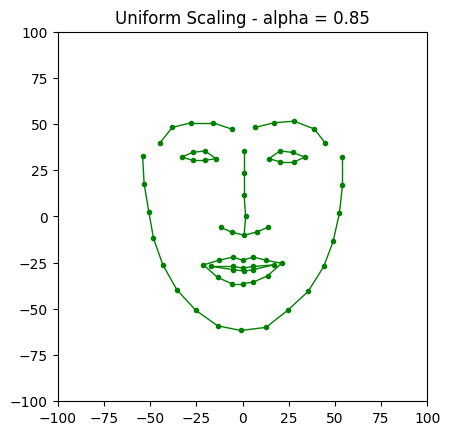

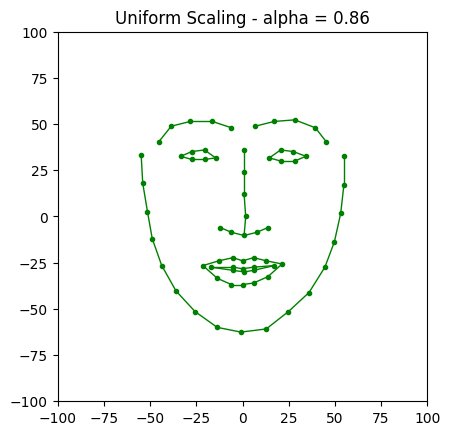

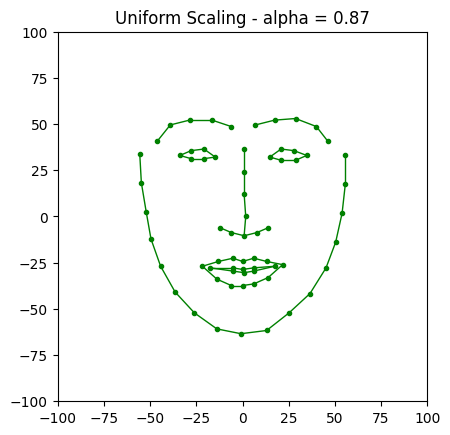

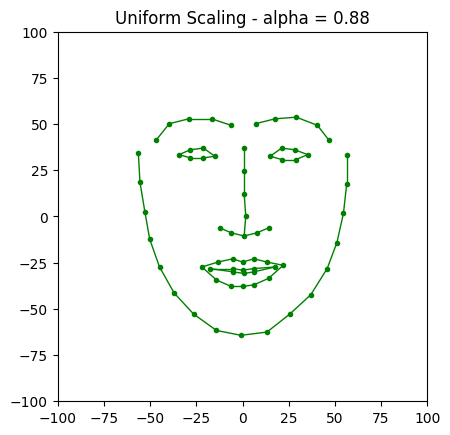

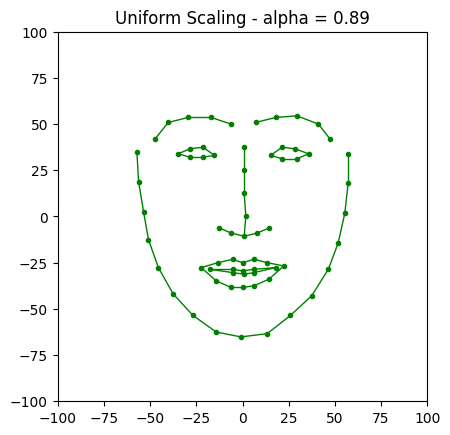

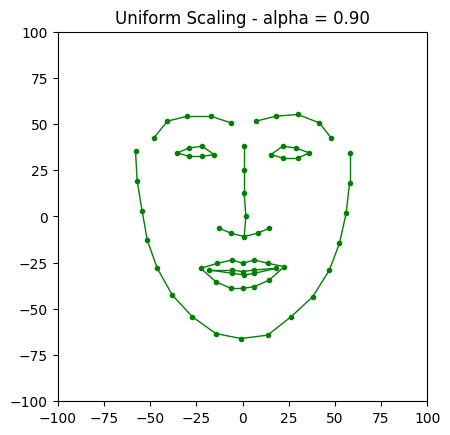

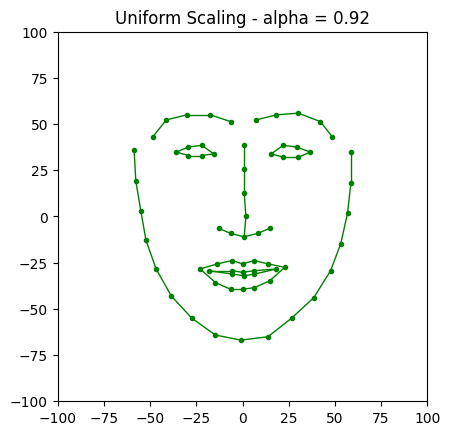

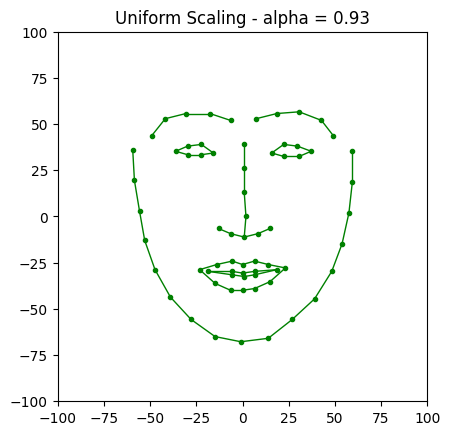

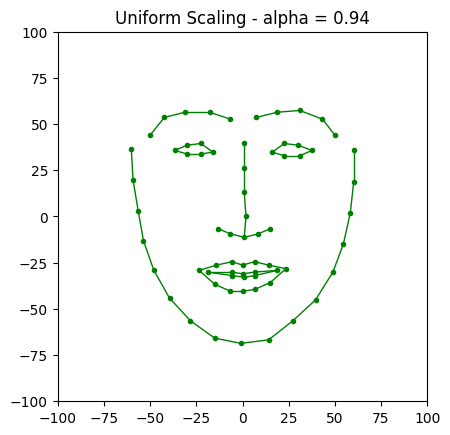

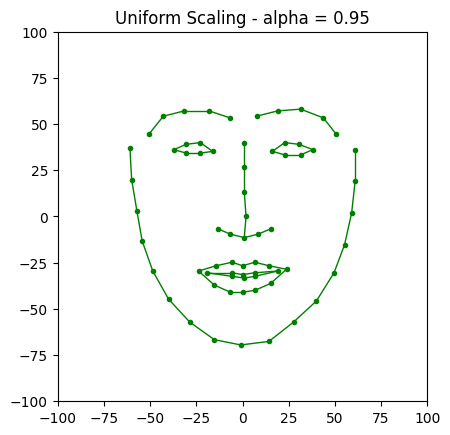

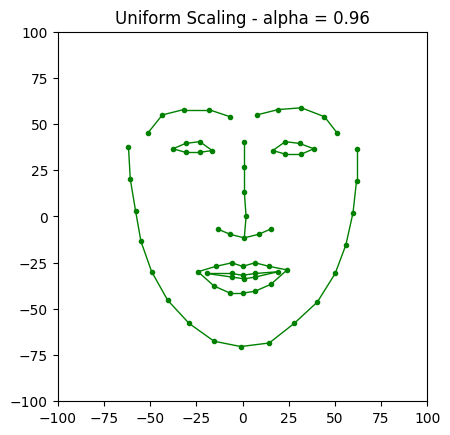

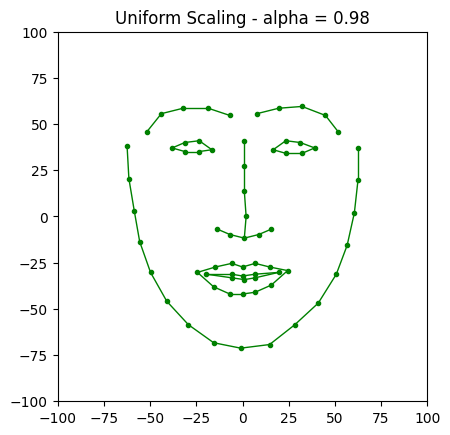

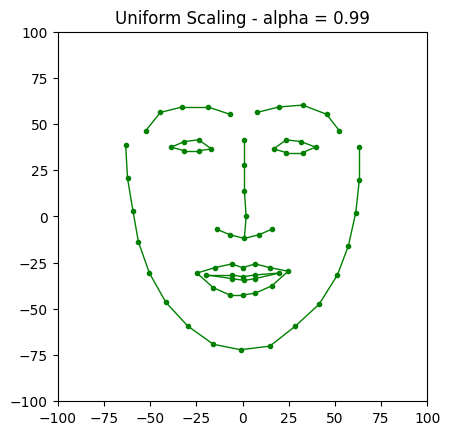

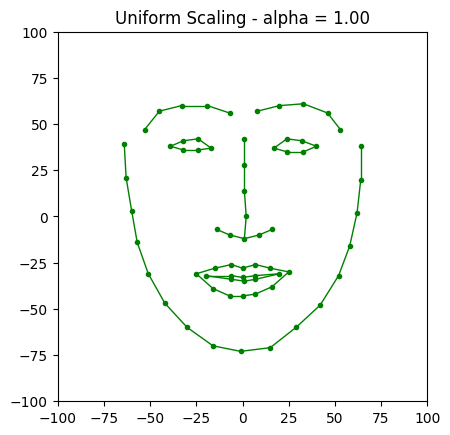

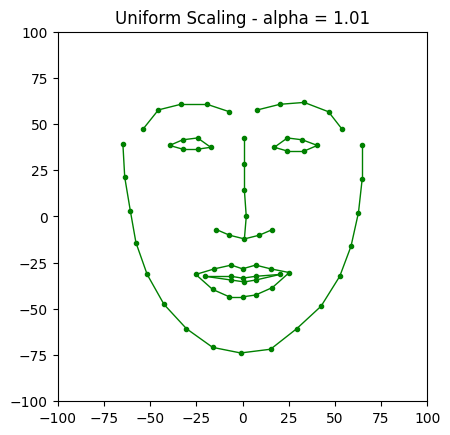

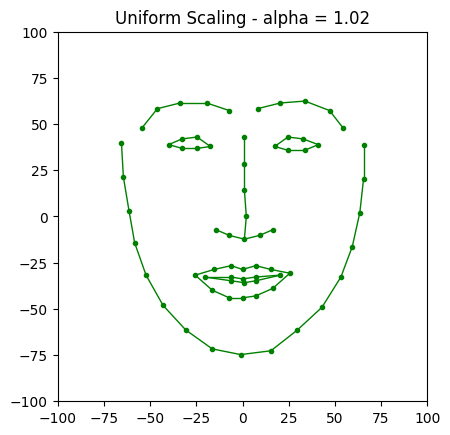

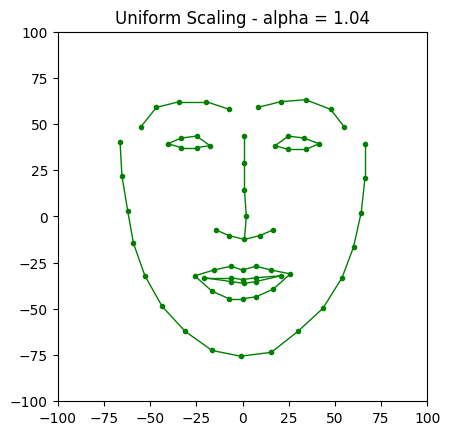

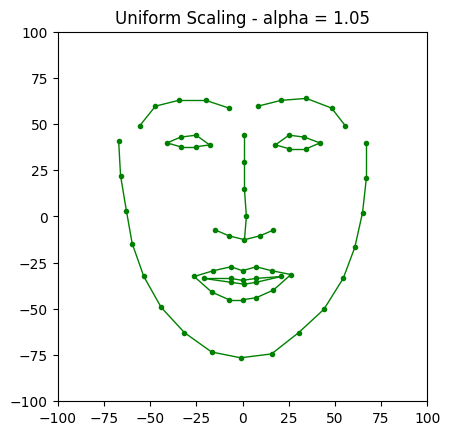

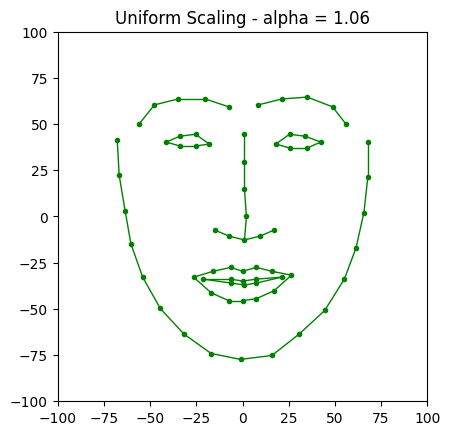

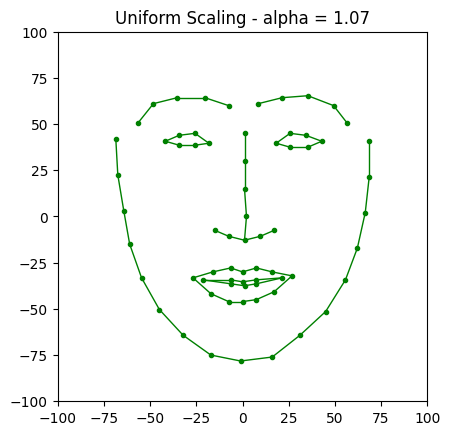

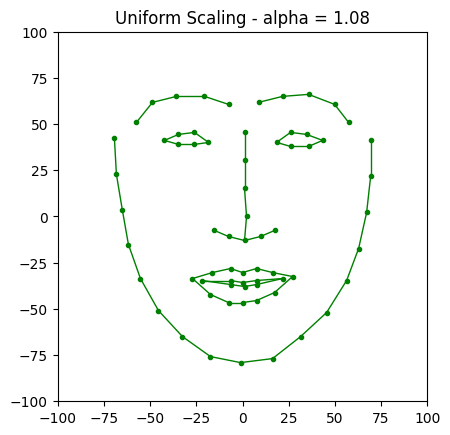

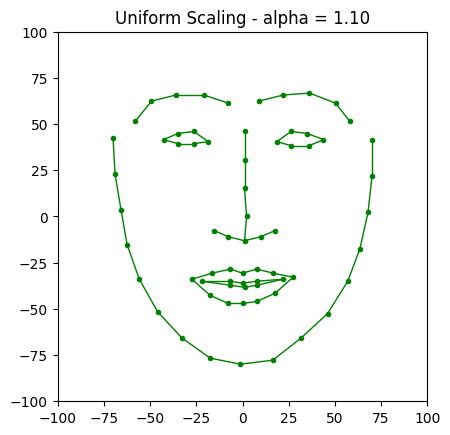

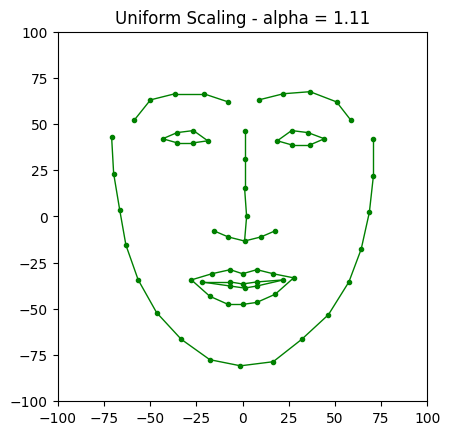

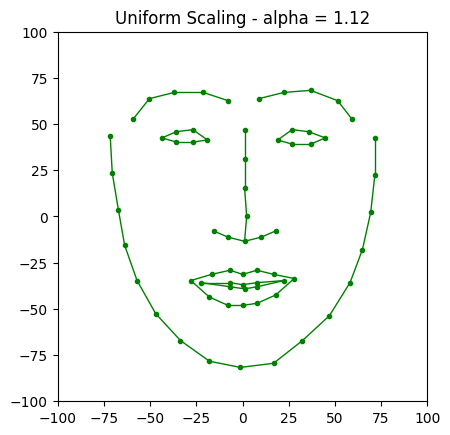

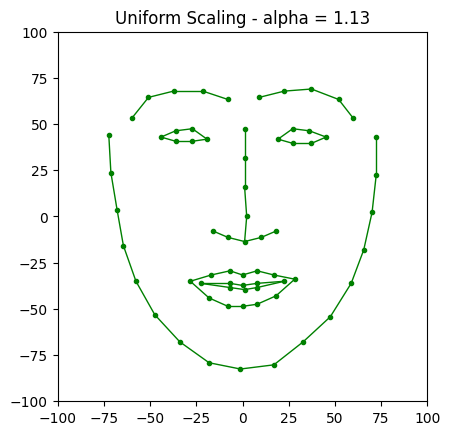

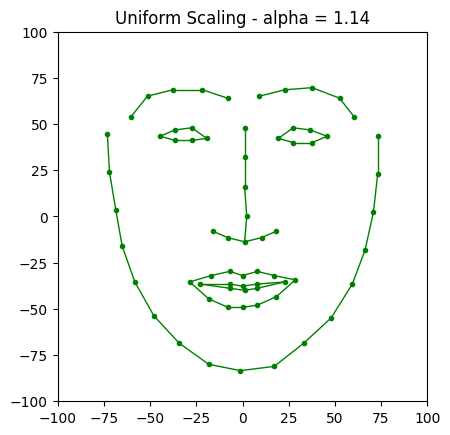

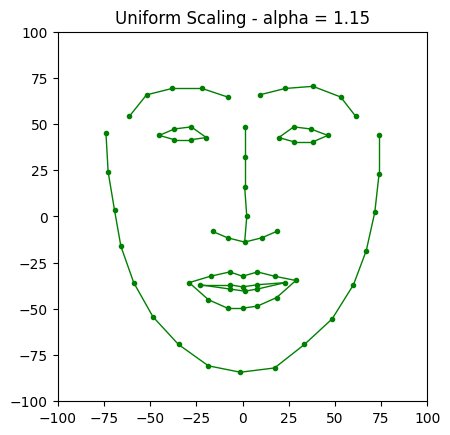

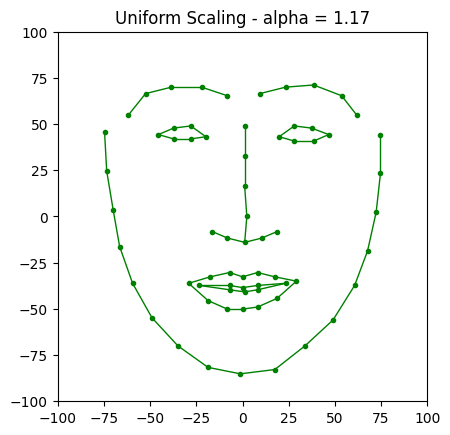

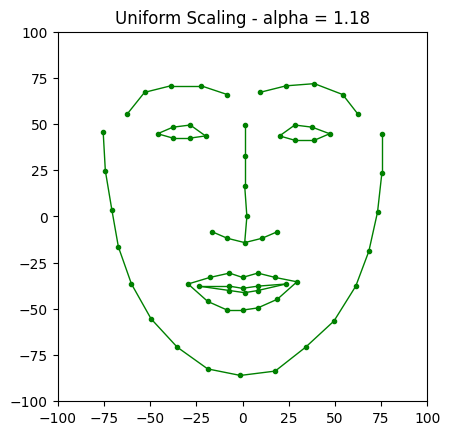

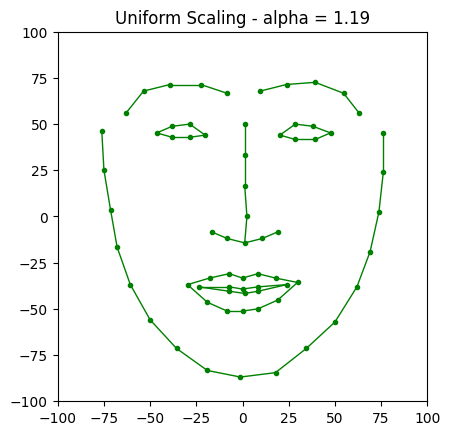

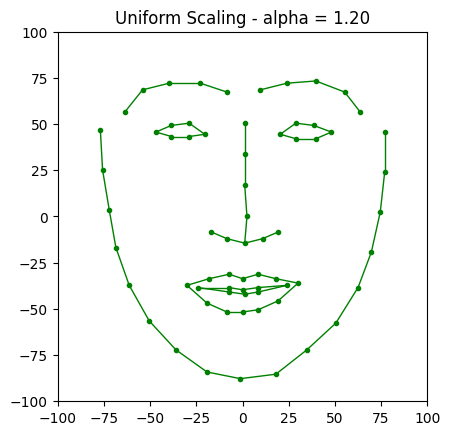

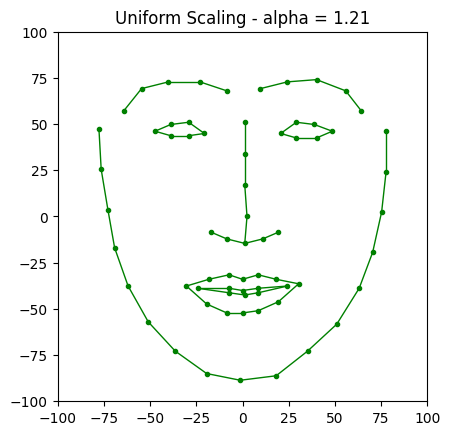

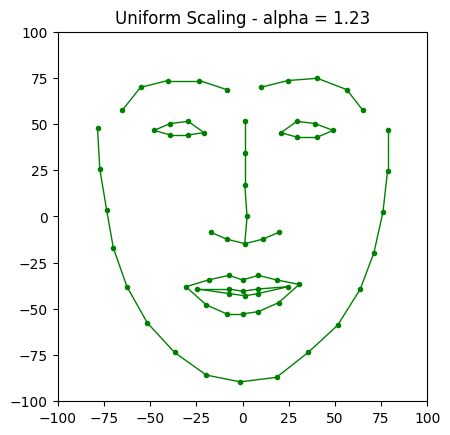

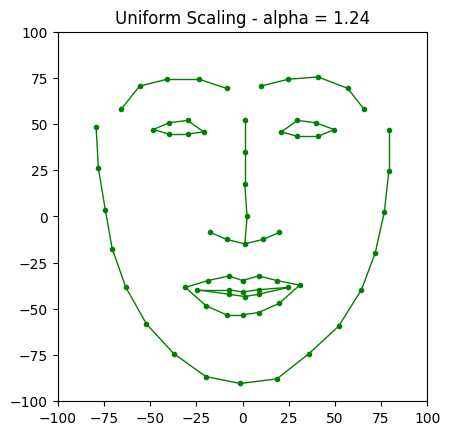

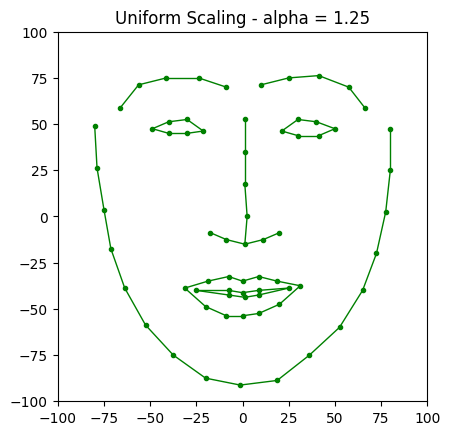

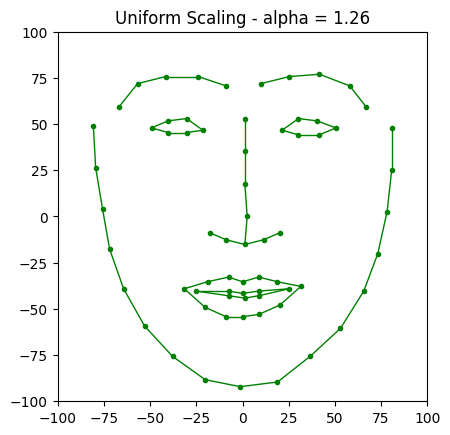

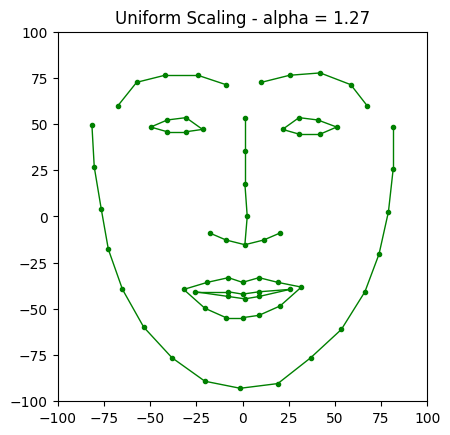

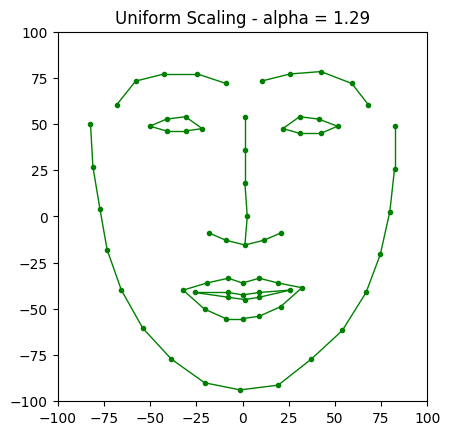

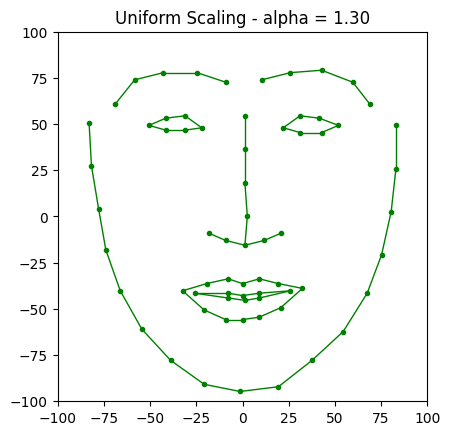

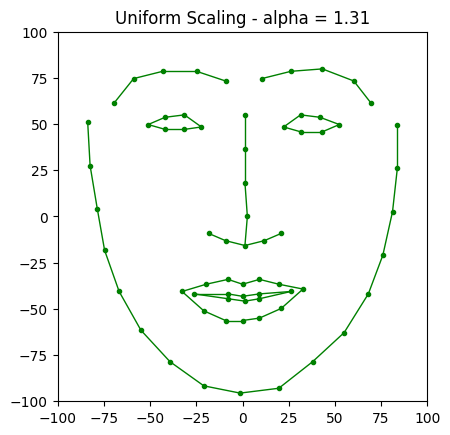

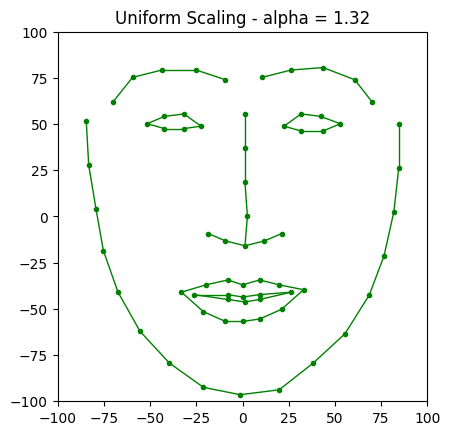

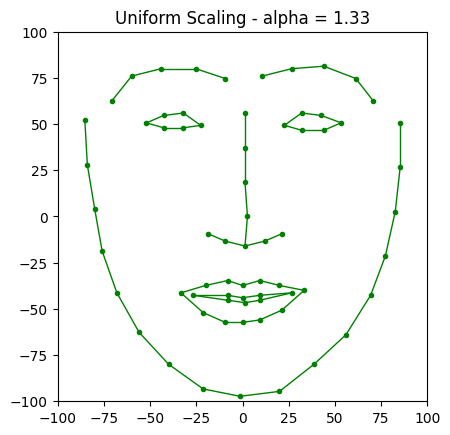

Testing negative alpha...


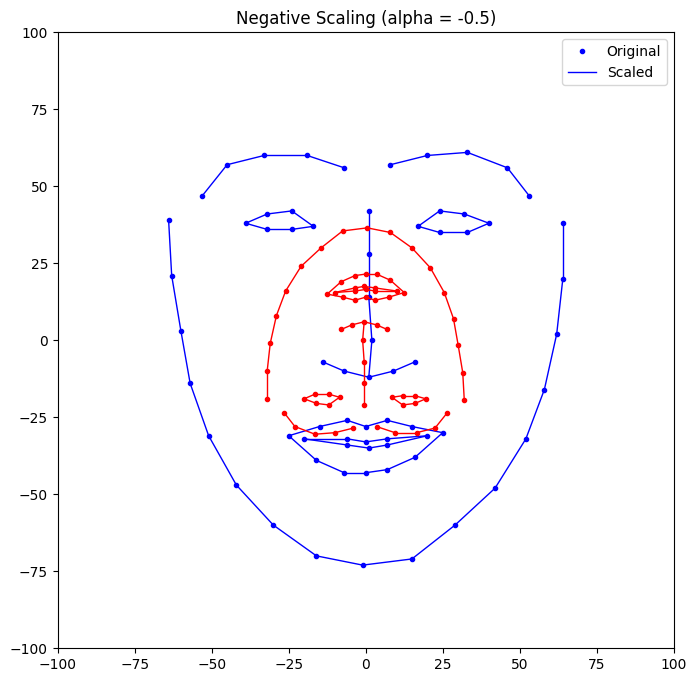

4C: Non-uniform scaling animation


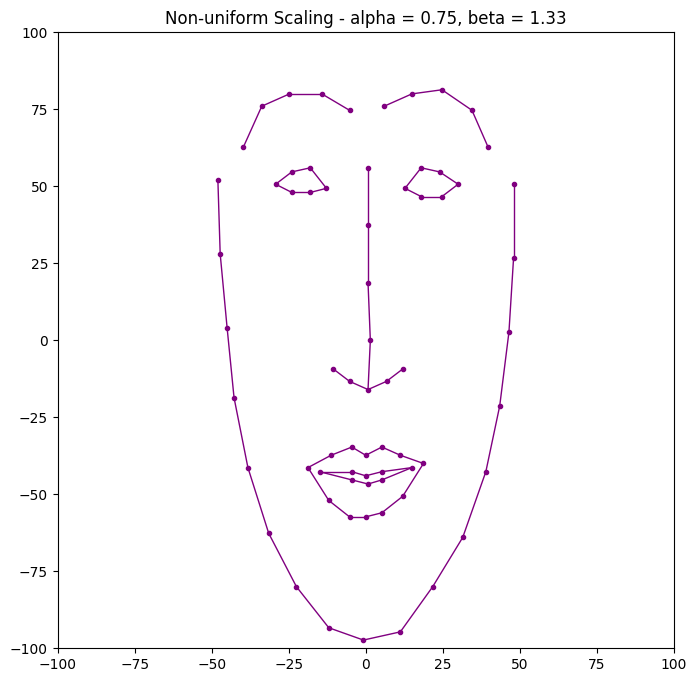

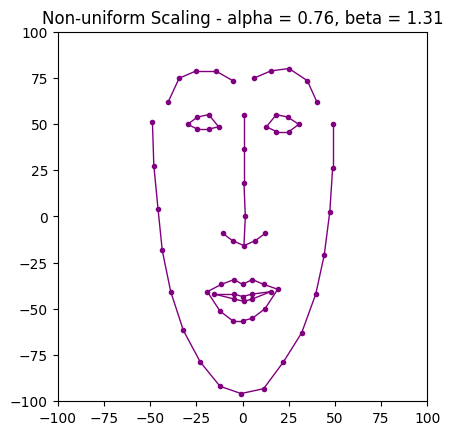

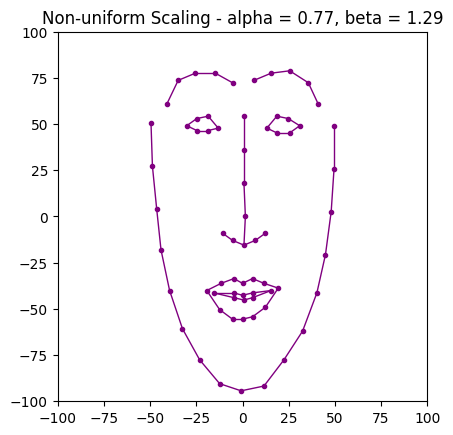

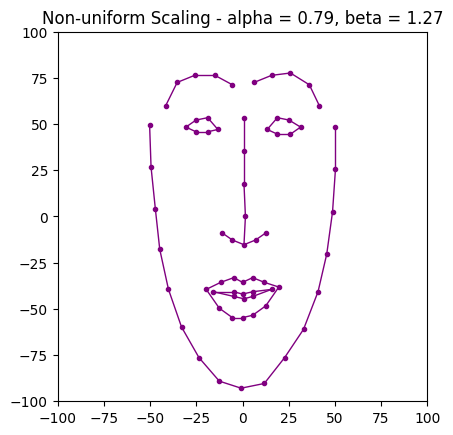

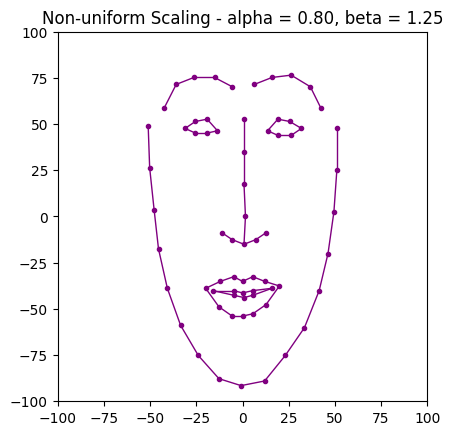

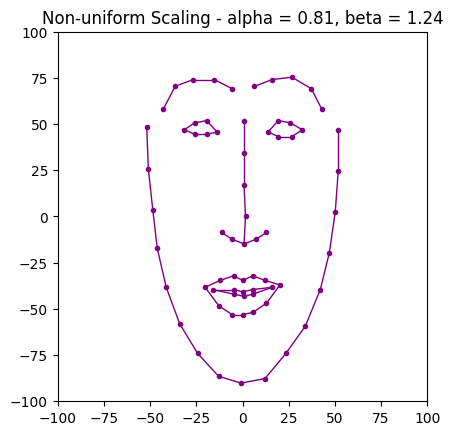

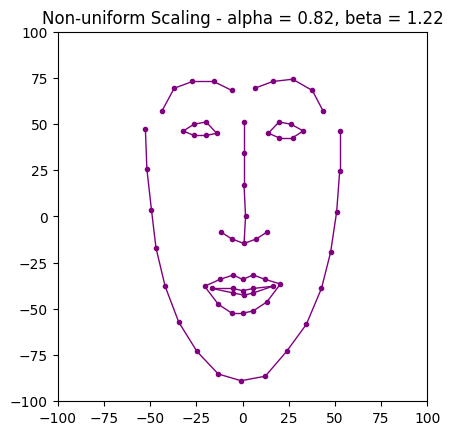

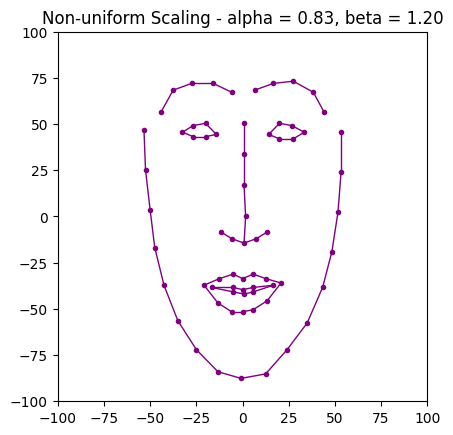

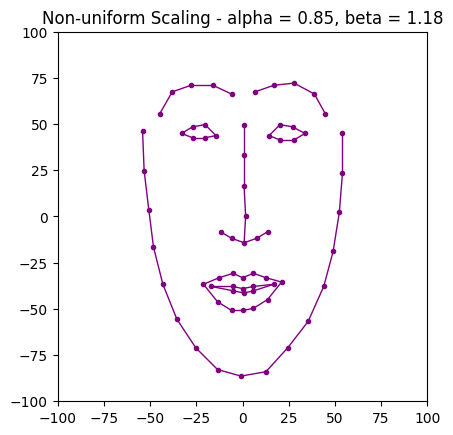

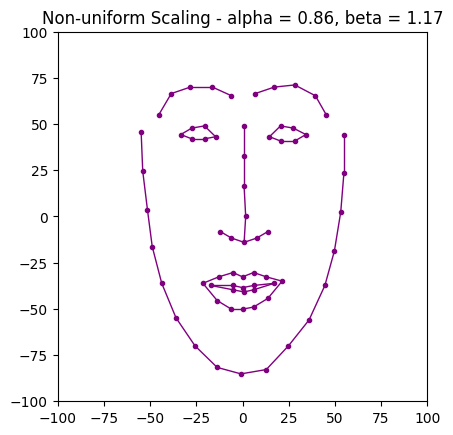

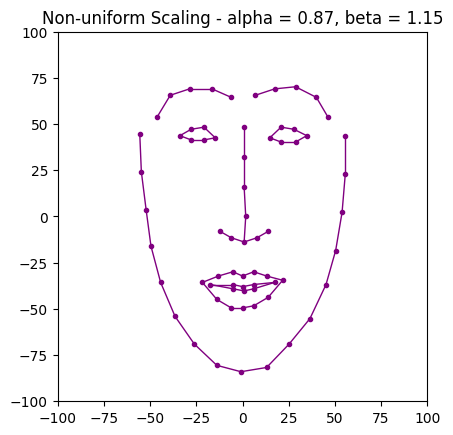

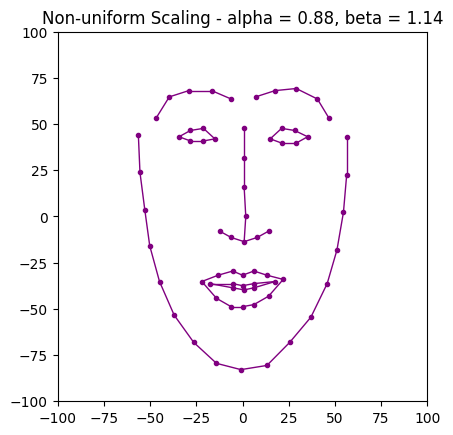

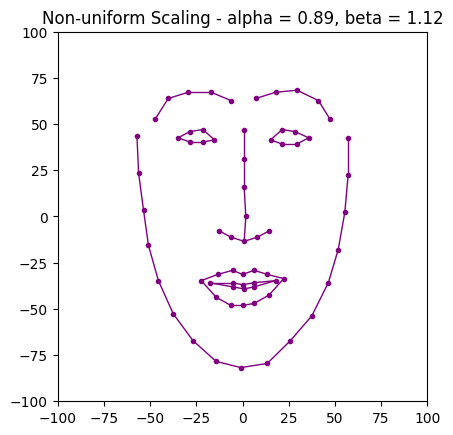

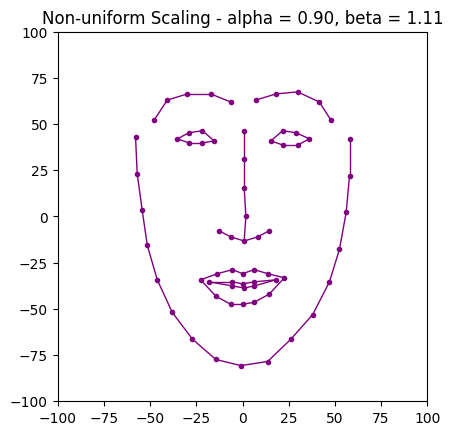

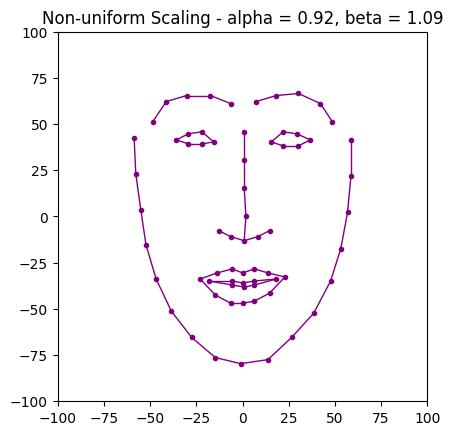

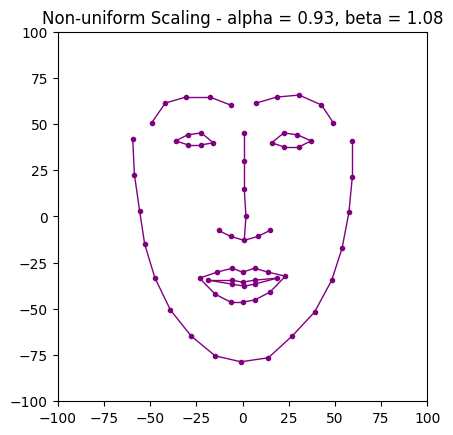

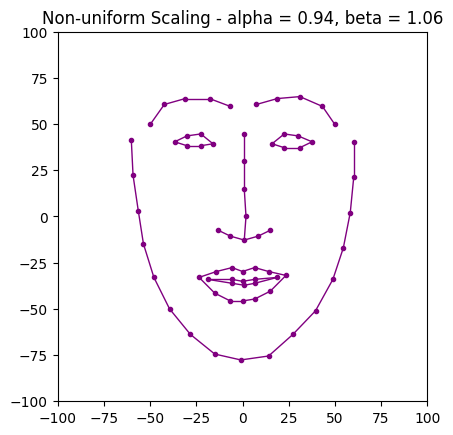

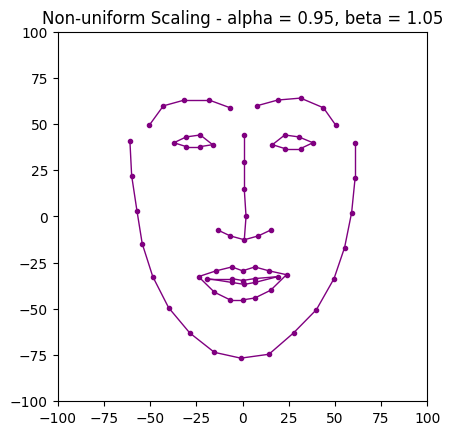

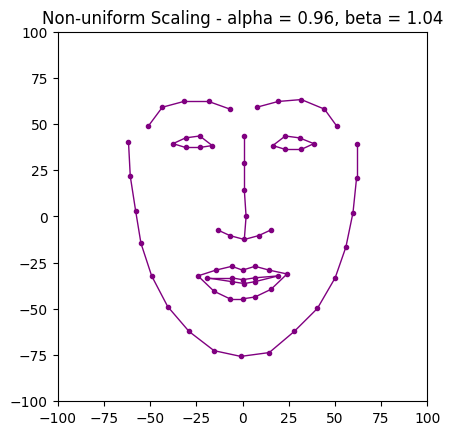

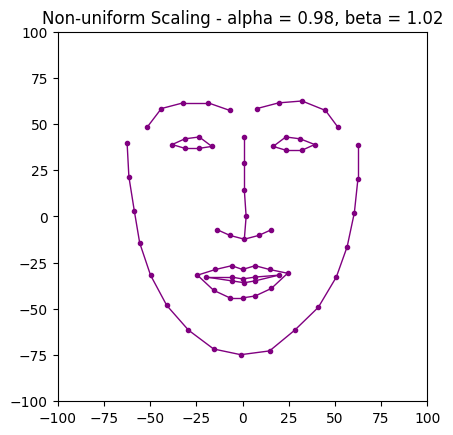

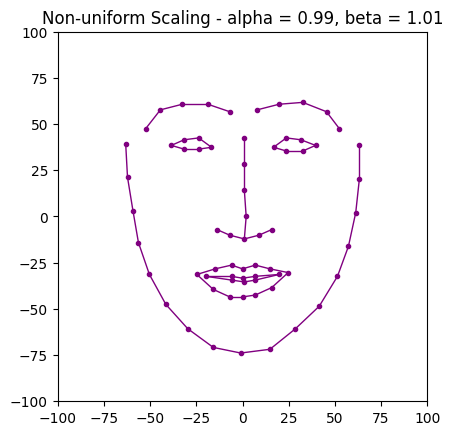

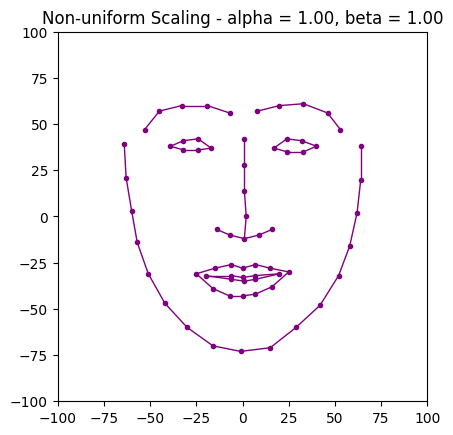

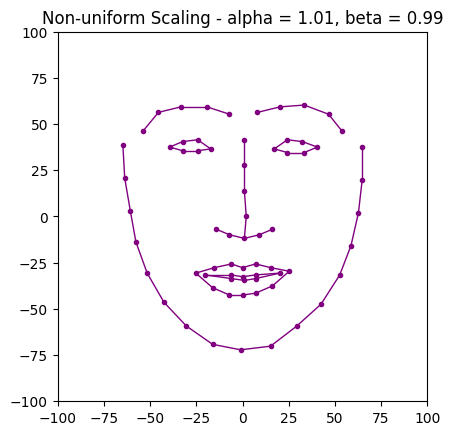

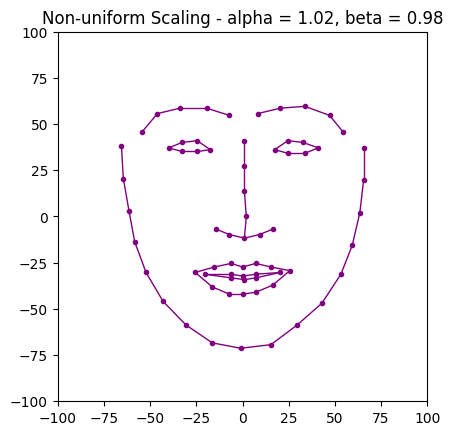

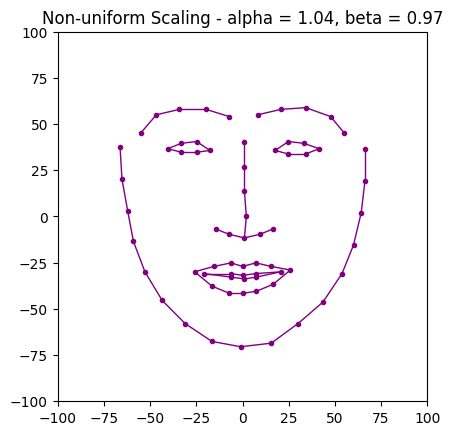

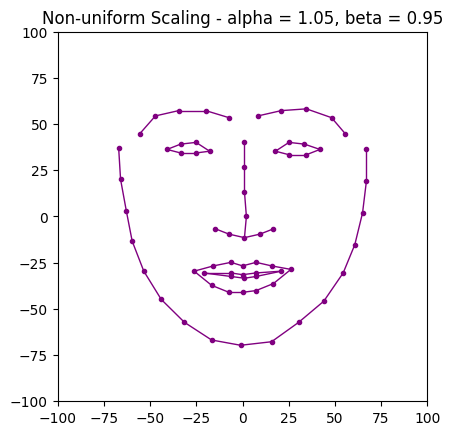

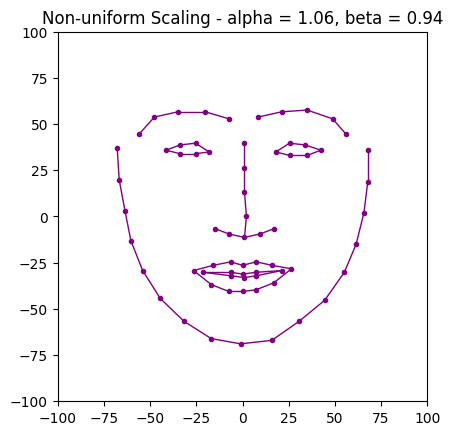

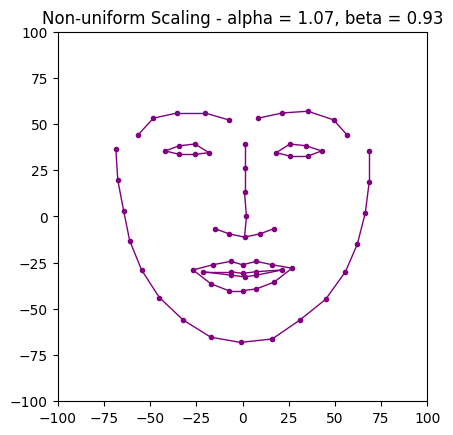

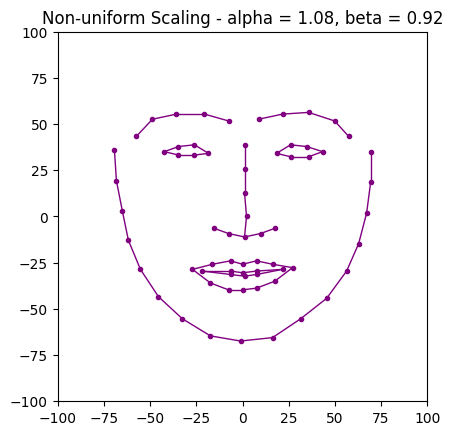

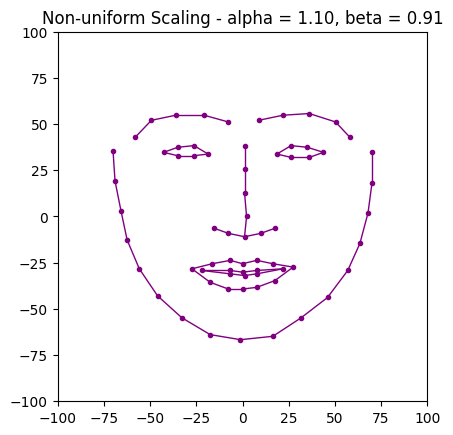

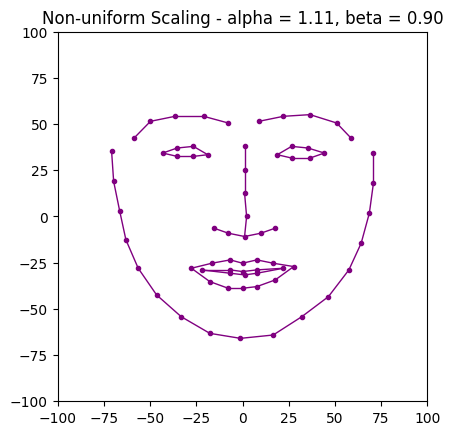

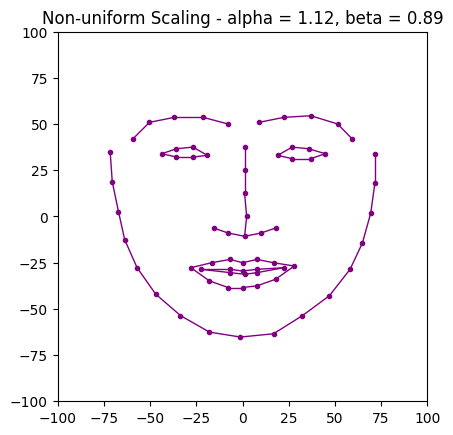

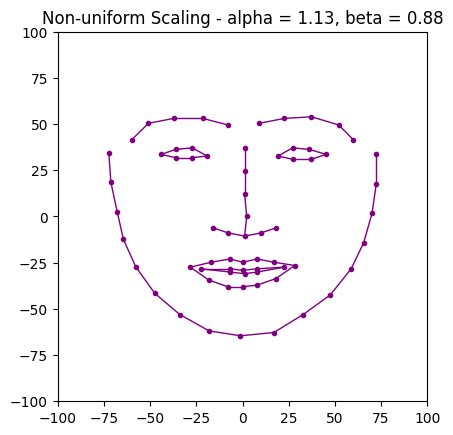

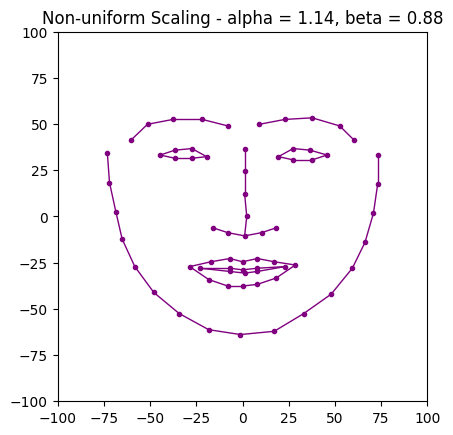

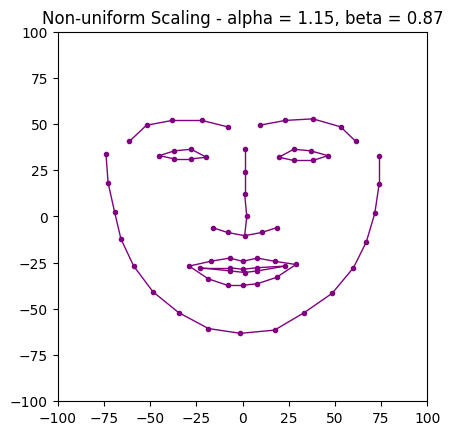

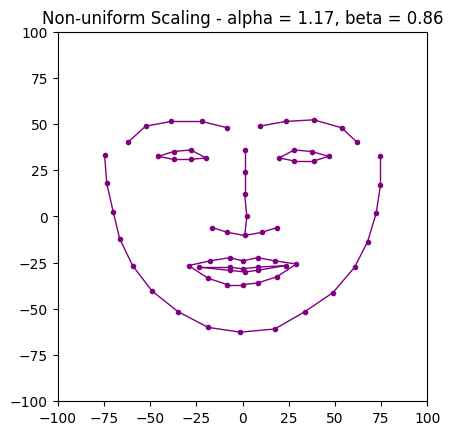

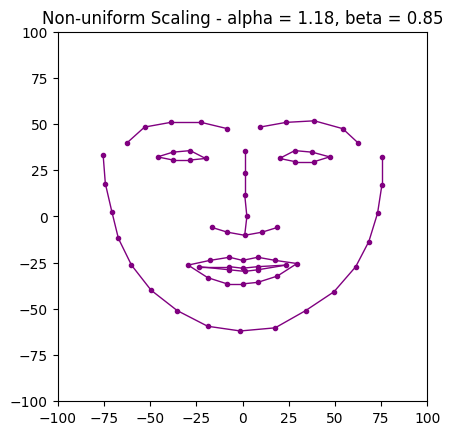

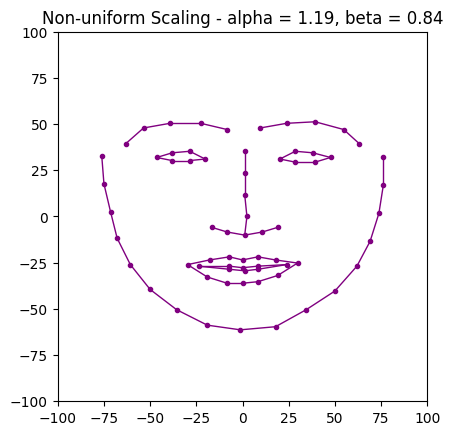

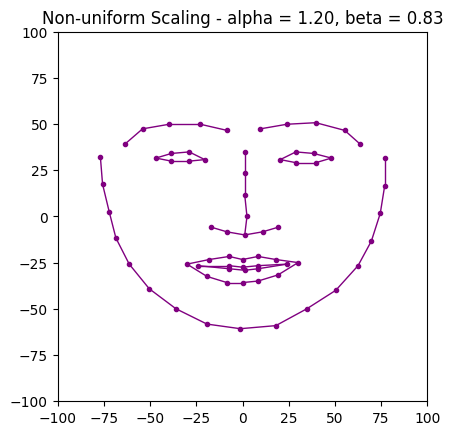

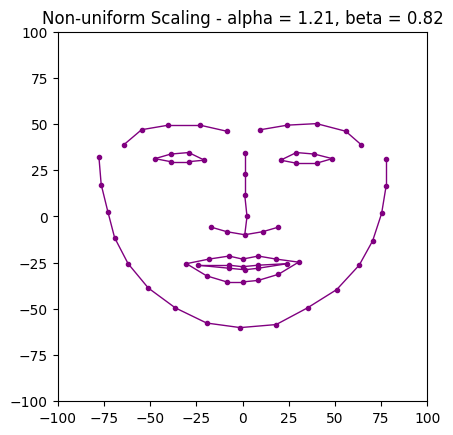

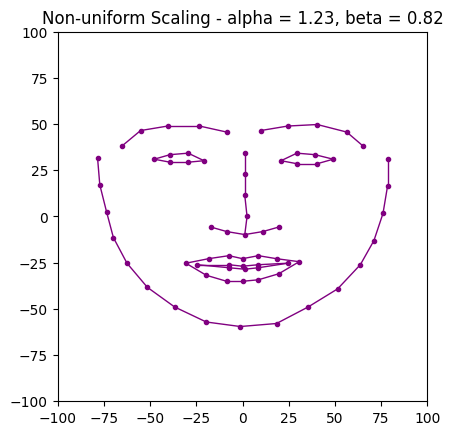

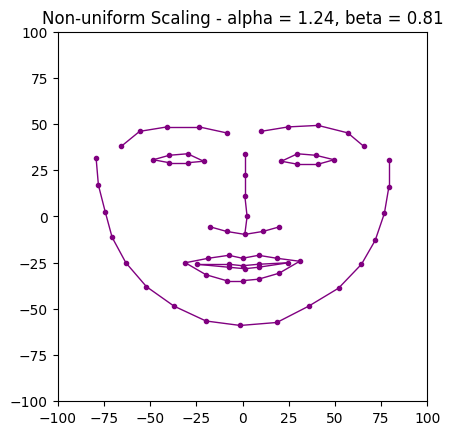

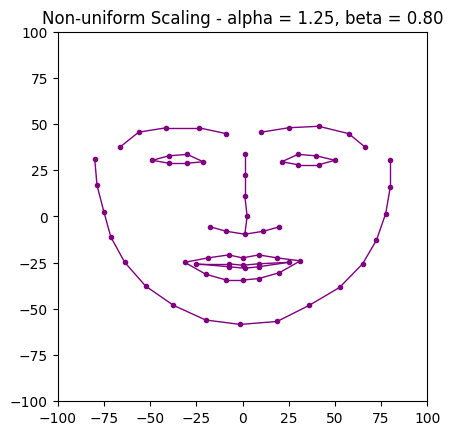

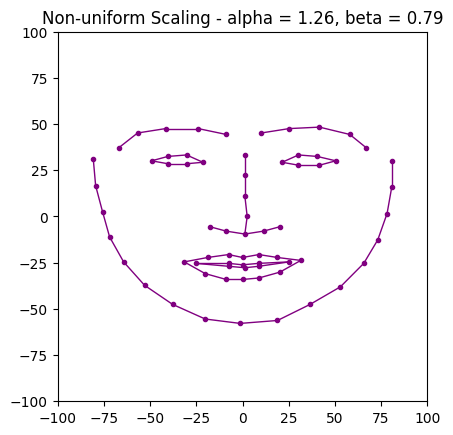

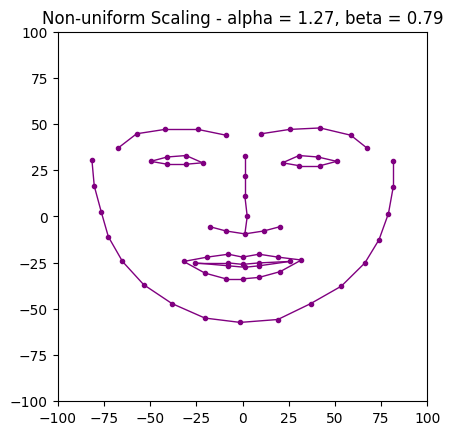

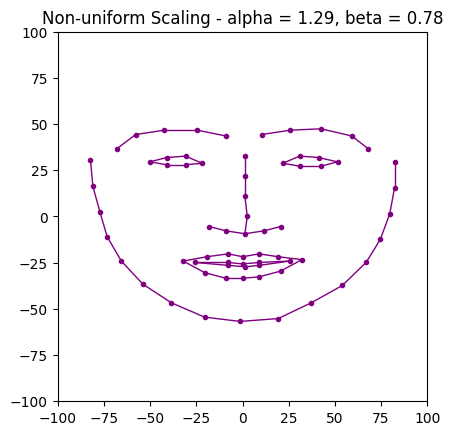

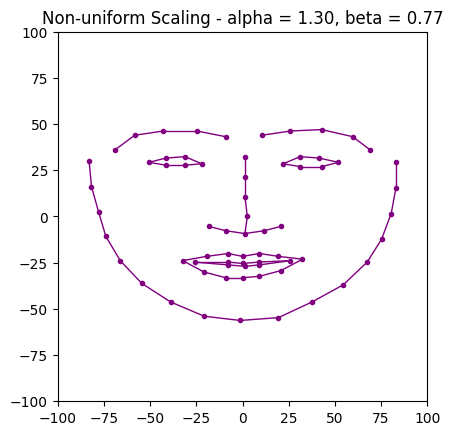

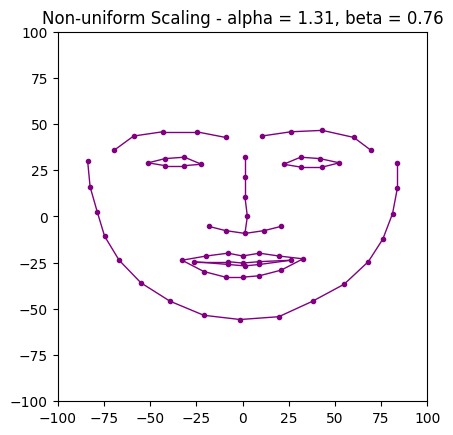

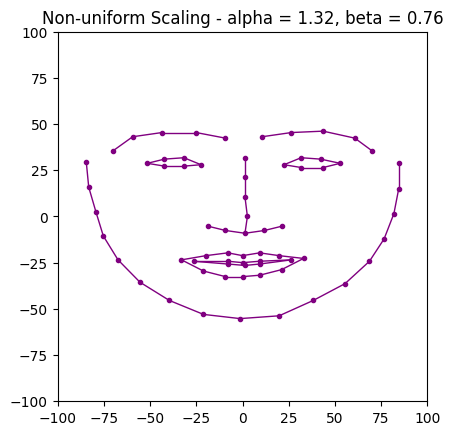

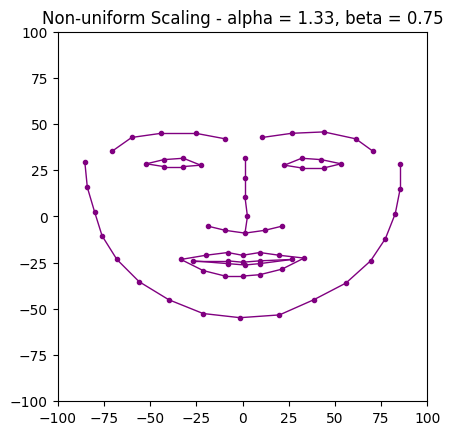

4D: Shear animation


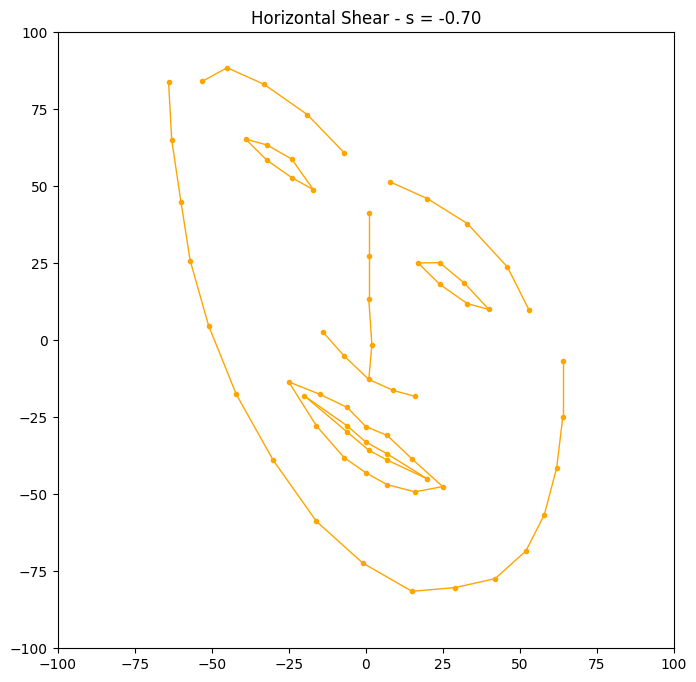

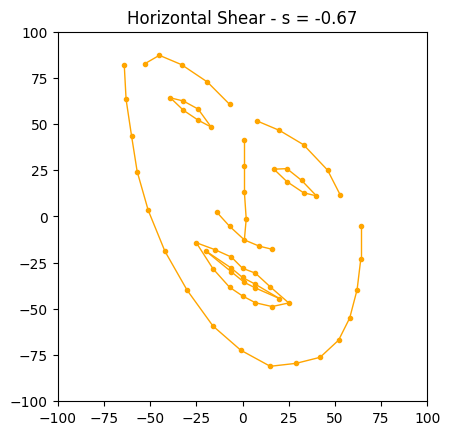

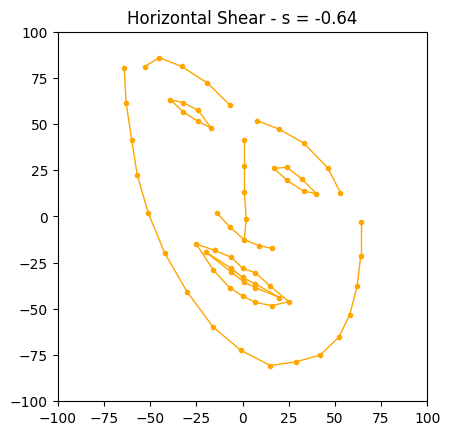

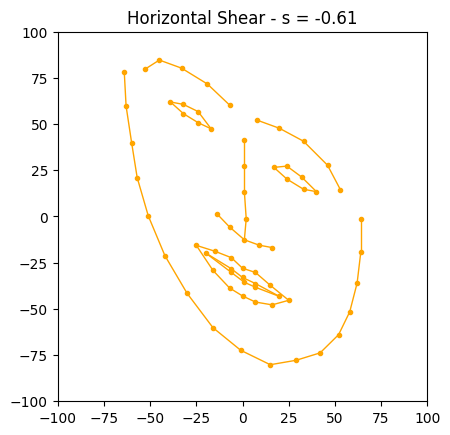

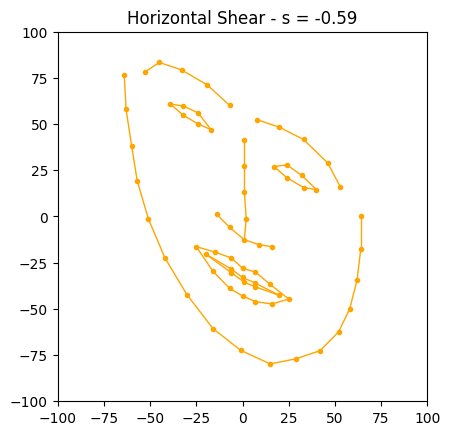

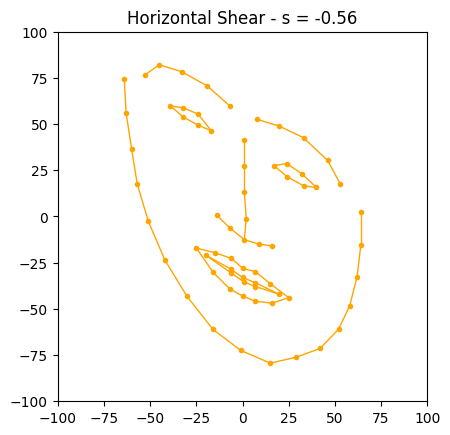

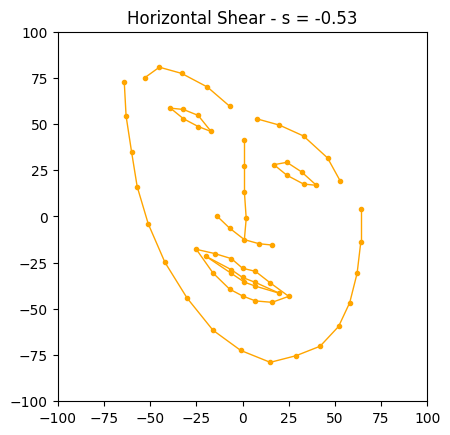

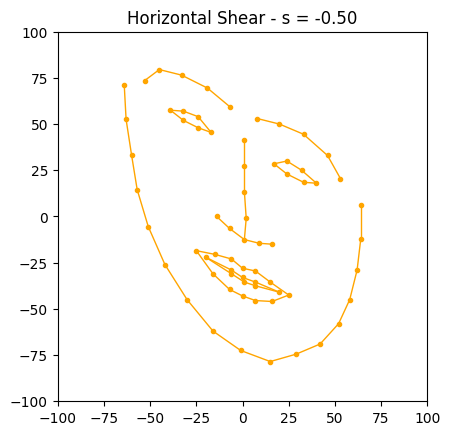

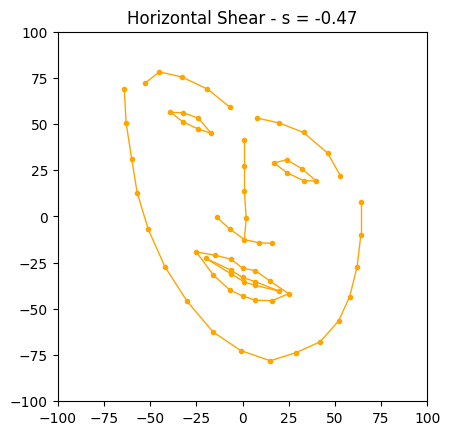

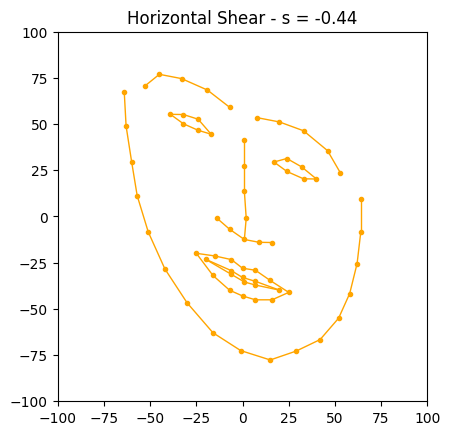

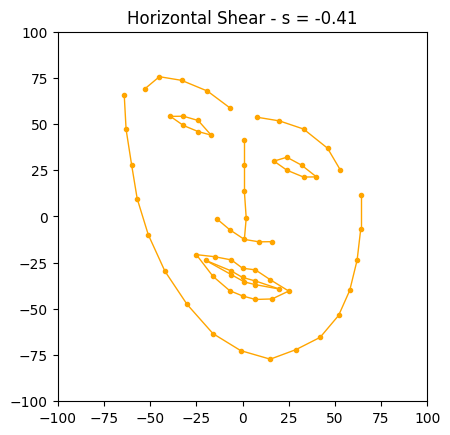

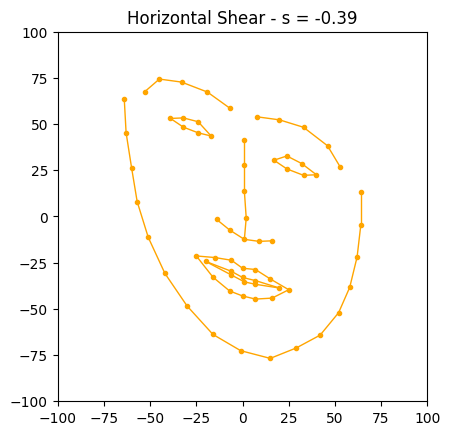

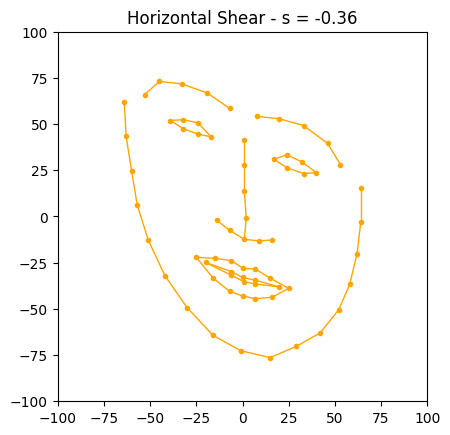

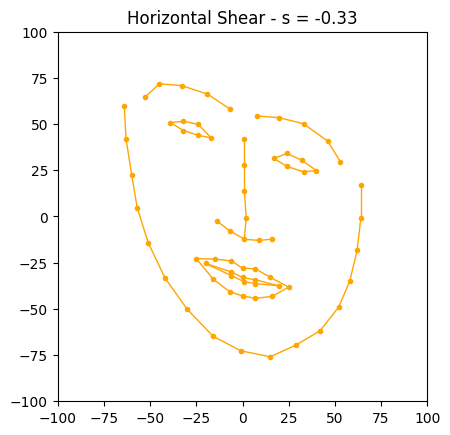

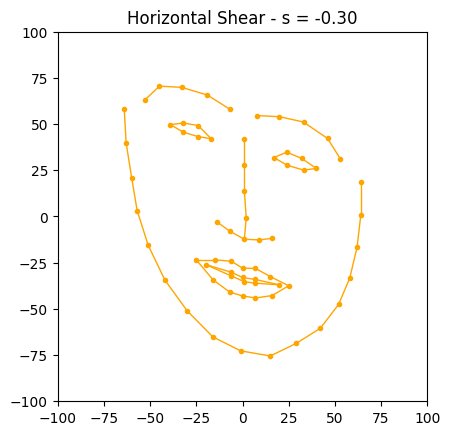

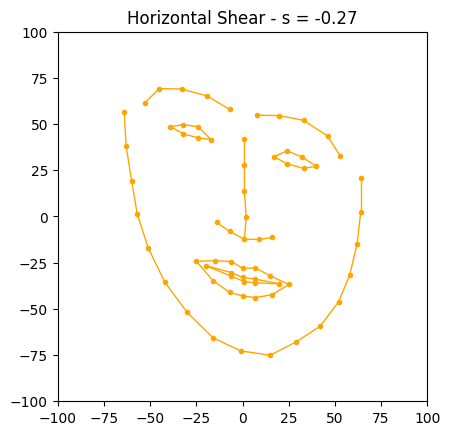

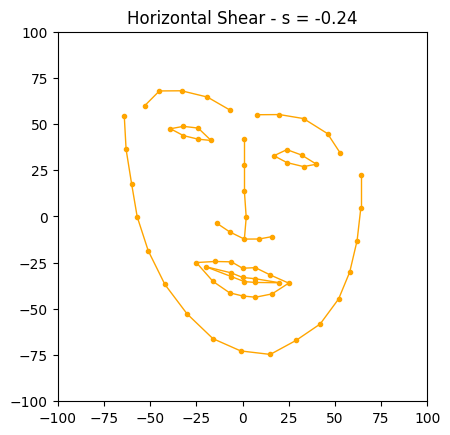

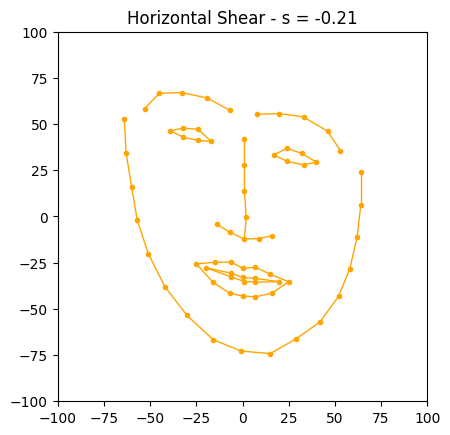

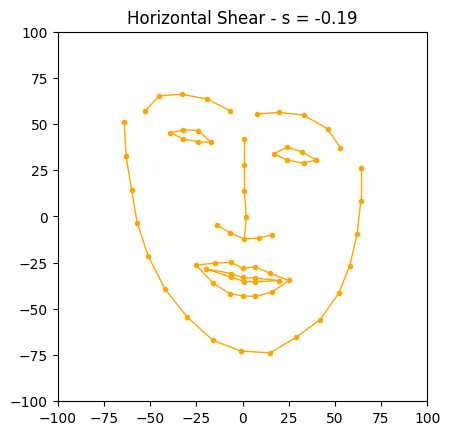

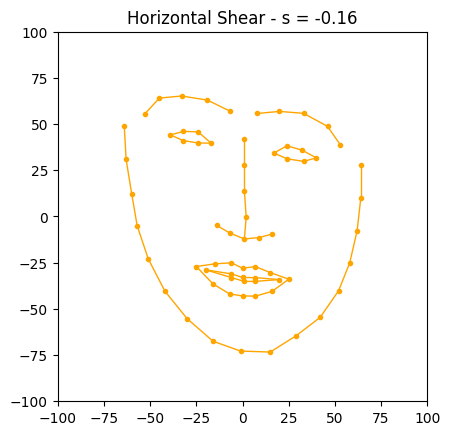

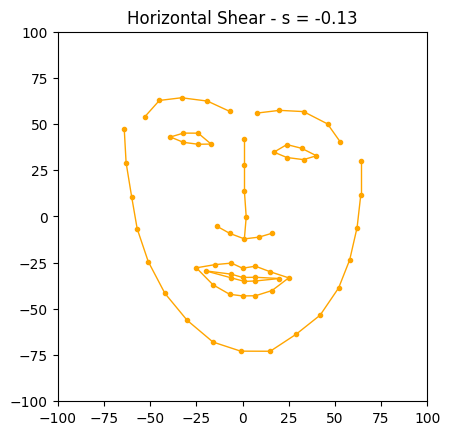

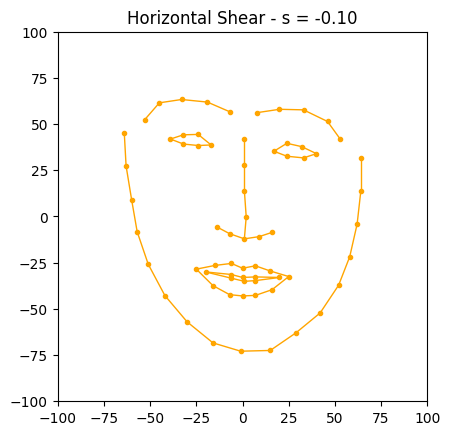

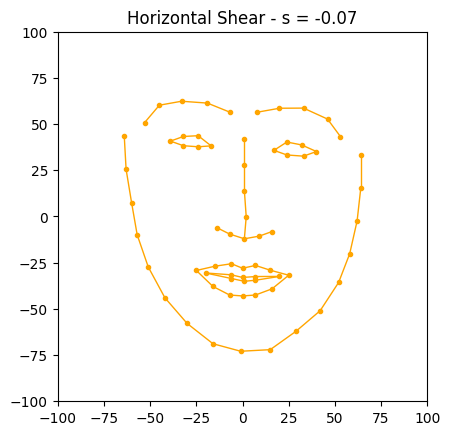

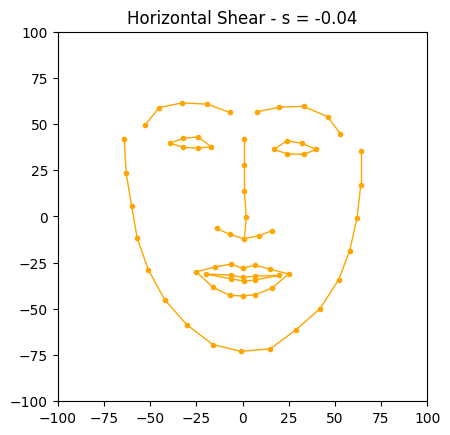

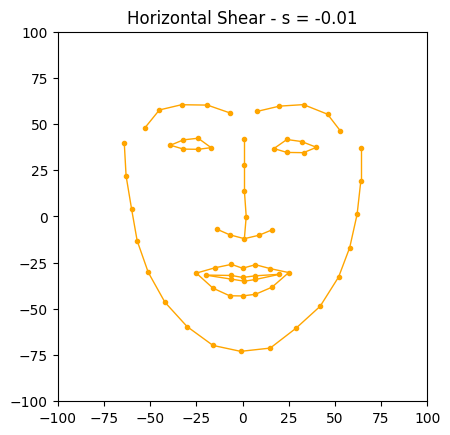

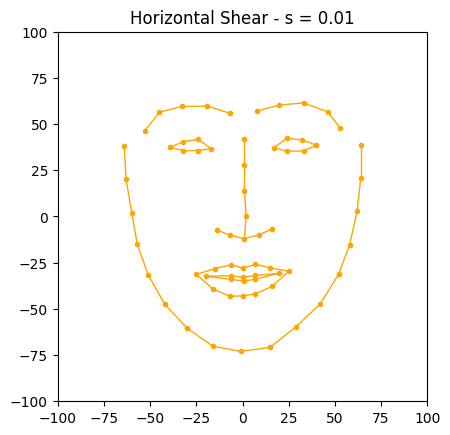

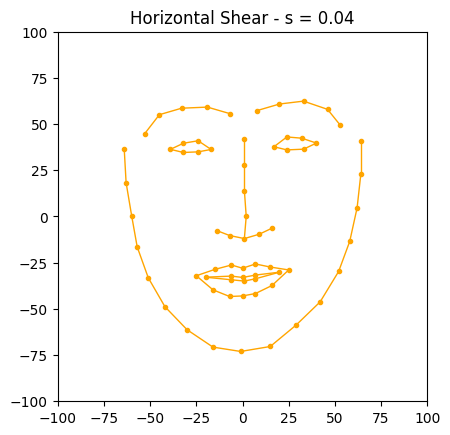

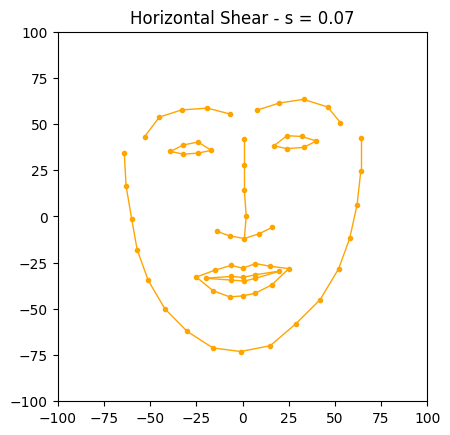

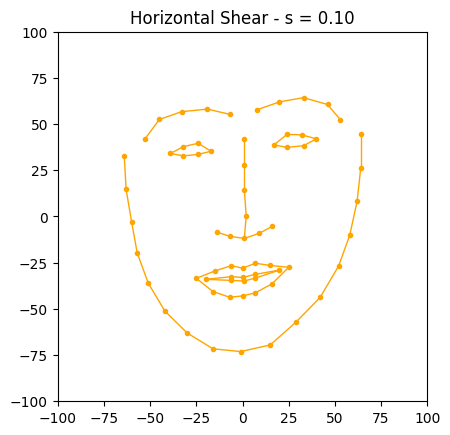

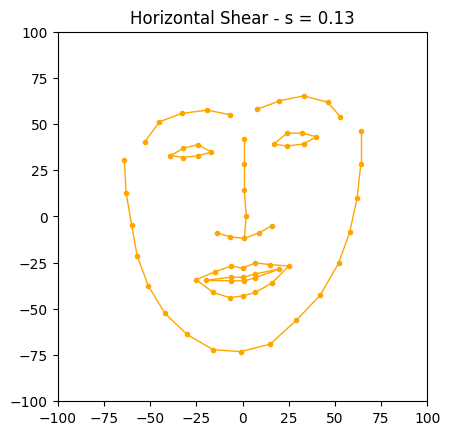

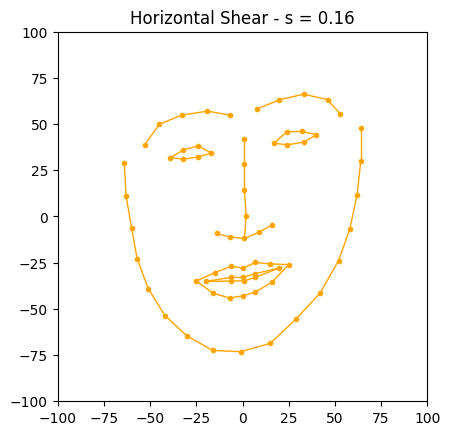

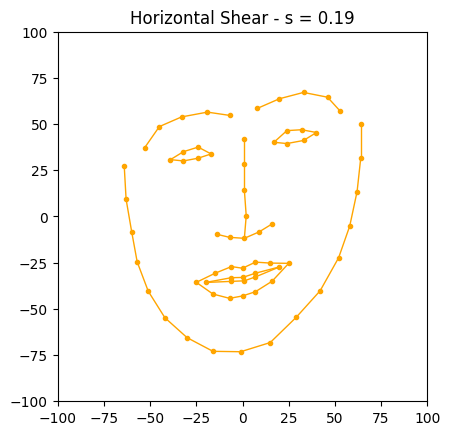

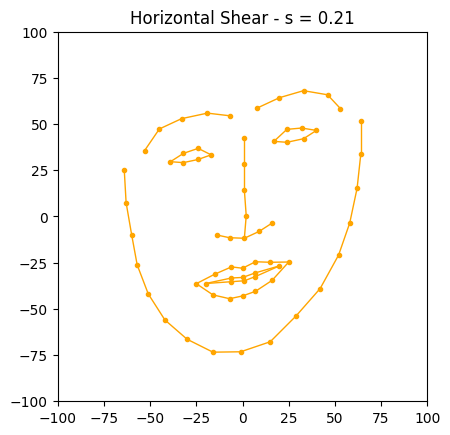

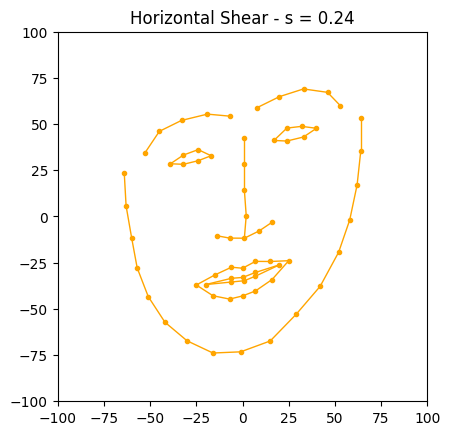

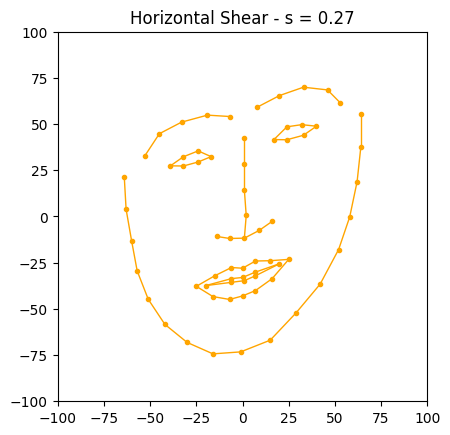

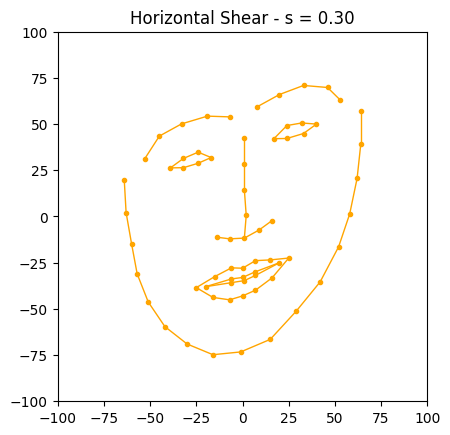

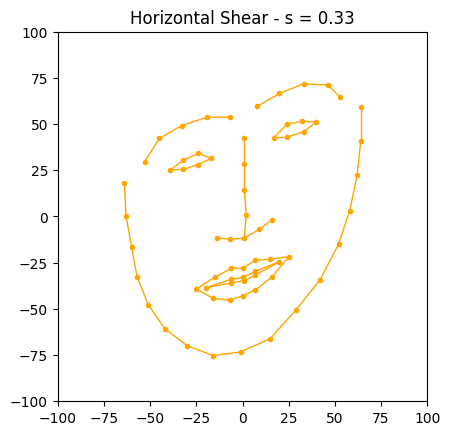

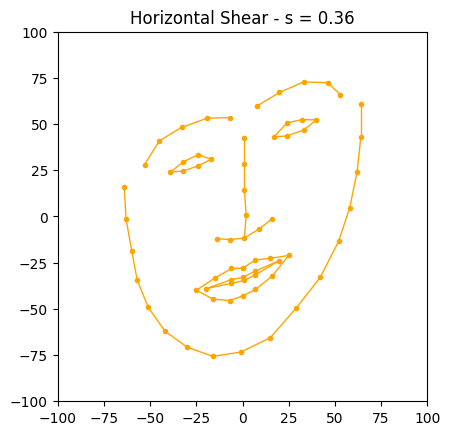

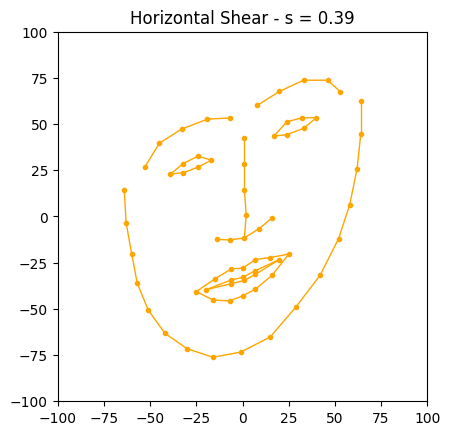

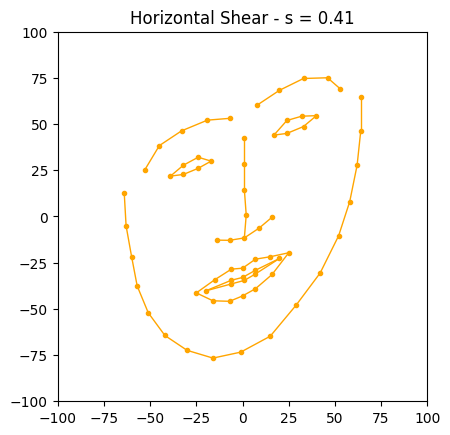

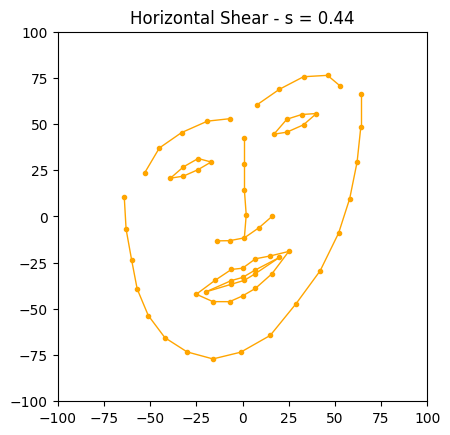

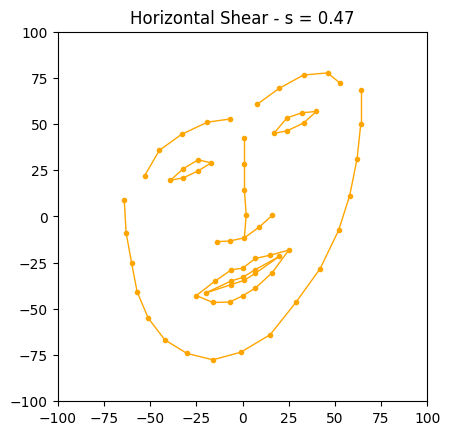

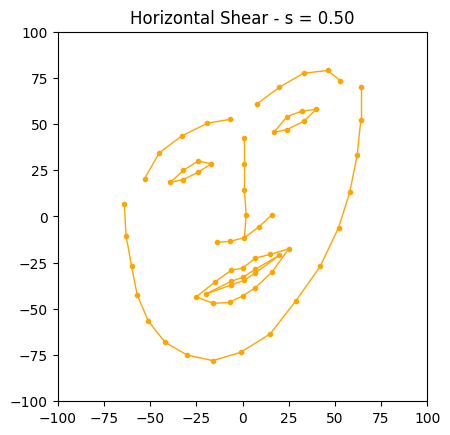

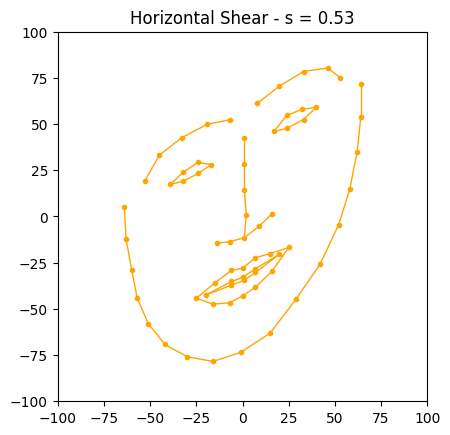

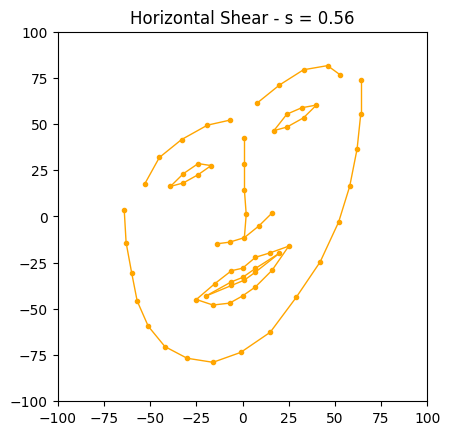

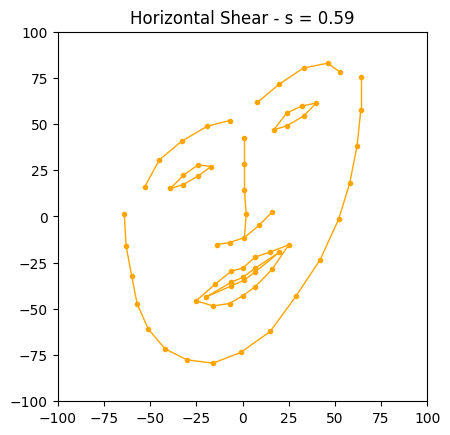

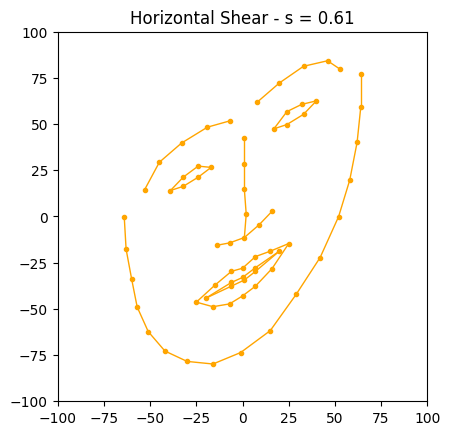

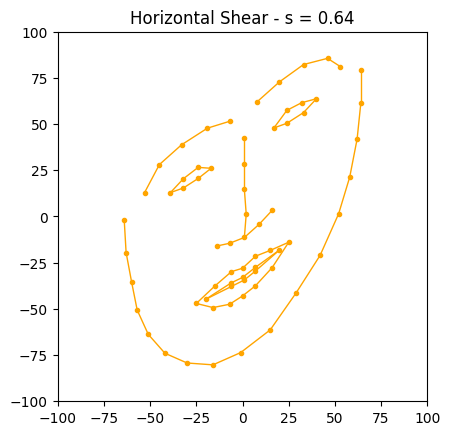

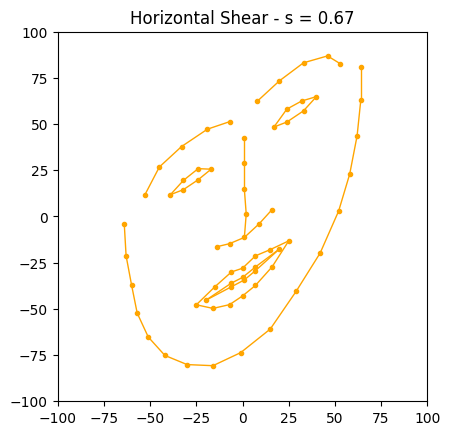

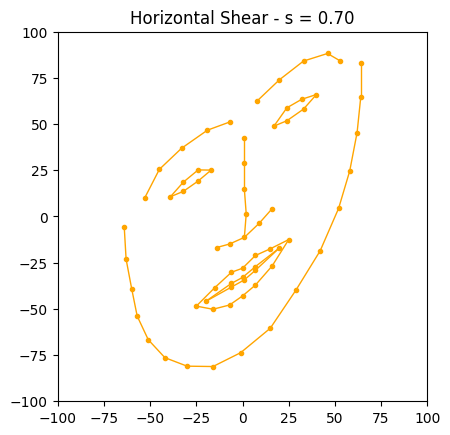

Vertical shear for comparison


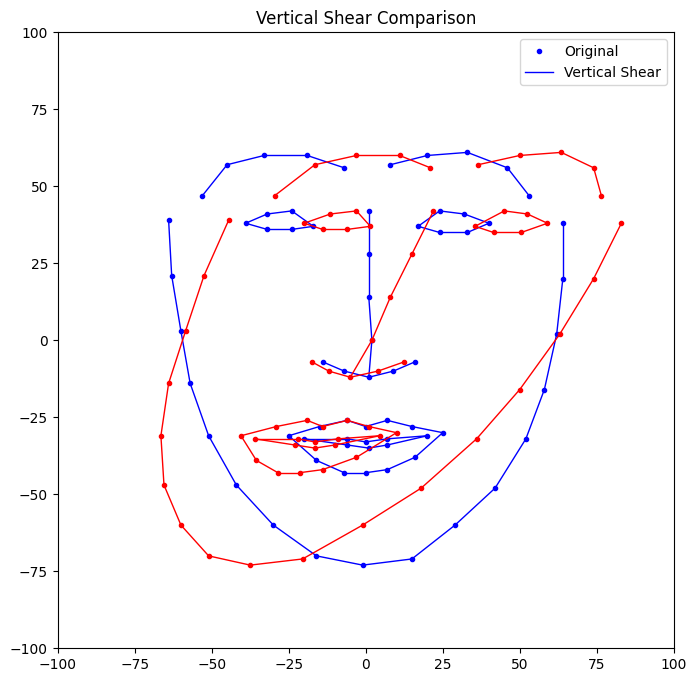

In [5]:
# 4A: Rotation animation
print("4A: Rotation animation")
plt.ion()
fig, ax = plt.subplots(figsize=(8, 8))

for th in np.linspace(0, 2*np.pi, 60):
    plt.cla()
    A_rot = np.array([[np.cos(th), np.sin(th)],
                      [-np.sin(th), np.cos(th)]])
    
    X_rot = Face1 @ A_rot
    plot_face(plt, X_rot, edges, color='blue')
    plt.title(f'Rotation - theta = {th:.2f} radians')
    plt.draw()
    plt.pause(0.05)

plt.ioff()

# 4B: Uniform scaling animation
print("4B: Uniform scaling animation")
plt.ion()
fig, ax = plt.subplots(figsize=(8, 8))

for alpha in np.linspace(0.75, 1.333, 50):
    plt.cla()
    A_scale = np.array([[alpha, 0],
                        [0, alpha]])
    
    X_scaled = Face1 @ A_scale
    plot_face(plt, X_scaled, edges, color='green')
    plt.title(f'Uniform Scaling - alpha = {alpha:.2f}')
    plt.draw()
    plt.pause(0.05)

plt.ioff()

# Test negative alpha
print("Testing negative alpha...")
alpha_negative = -0.5
A_neg = np.array([[alpha_negative, 0],
                  [0, alpha_negative]])
X_neg = Face1 @ A_neg

plt.figure(figsize=(8, 8))
plot_face(plt, Face1, edges, color='blue')
plot_face(plt, X_neg, edges, color='red')
plt.title(f'Negative Scaling (alpha = {alpha_negative})')
plt.legend(['Original', 'Scaled'])
plt.show()

# 4C: Non-uniform scaling animation
print("4C: Non-uniform scaling animation")
plt.ion()
fig, ax = plt.subplots(figsize=(8, 8))

for alpha in np.linspace(0.75, 1.333, 50):
    plt.cla()
    beta = 1/alpha
    A_nonuniform = np.array([[alpha, 0],
                             [0, beta]])
    
    X_nonuniform = Face1 @ A_nonuniform
    plot_face(plt, X_nonuniform, edges, color='purple')
    plt.title(f'Non-uniform Scaling - alpha = {alpha:.2f}, beta = {beta:.2f}')
    plt.draw()
    plt.pause(0.05)

plt.ioff()

# 4D: Shear animation
print("4D: Shear animation")
plt.ion()
fig, ax = plt.subplots(figsize=(8, 8))

for s in np.linspace(-0.7, 0.7, 50):
    plt.cla()
    A_shear = np.array([[1, s],
                        [0, 1]])  # Horizontal shear
    
    X_shear = Face1 @ A_shear
    plot_face(plt, X_shear, edges, color='orange')
    plt.title(f'Horizontal Shear - s = {s:.2f}')
    plt.draw()
    plt.pause(0.05)

plt.ioff()

# Vertical shear for comparison
print("Vertical shear for comparison")
s = 0.5
A_vertical_shear = np.array([[1, 0],
                             [s, 1]])  # Vertical shear

X_vertical_shear = Face1 @ A_vertical_shear

plt.figure(figsize=(8, 8))
plot_face(plt, Face1, edges, color='blue')
plot_face(plt, X_vertical_shear, edges, color='red')
plt.title('Vertical Shear Comparison')
plt.legend(['Original', 'Vertical Shear'])
plt.show()


## 4A: Rotation

✅ Complete face rotation animation around the origin

**Answer to question**: The rotation matrix rotates counterclockwise because:
- Multiplying `Face1 @ A` applies column transformations
- In the computer coordinate system (y-down) this is equivalent to clockwise rotation

## 4B: Uniform Scaling

✅ Scaling animation from 0.75 to 1.33

**When alpha is negative**: The face becomes inverted and essentially mirrored

## 4C: Non-uniform Scaling

✅ Animation with β = 1/α

The face scales non-uniformly in x and y directions

## 4D: Shear

✅ Horizontal shear animation from -0.7 to 0.7

**Answer to question**: Even though a vertical shear matrix is defined, horizontal shear is applied because:
- Multiplying `Face1 @ A` applies column transformations  
- This causes x coordinates to be affected by y coordinates (horizontal shear)